# Final Project

## Introduction
This project has two objectives: 1) to replicate all the main results of the "2022 Street & Sidewalk Maintenance Standards Report" by the SF Controller's Office, and 2) to understand which of the uncleanliness features are likely to affect a neighborhood’s rating. Objective 1 will require a descriptive analysis of the dataset, while Objective 2 will require a correlation analysis and regression analysis. They did not provide any code or details on how they came up with their results or created the visualizations, so my code below will be an attempt at replicating the results. 

The report splits up the dataset into two categories that they call the Core Citywide Survey and the special Key Commercial Areas Survey. The Core Citywide Survey is a random sample of 1000, with 80% of the sample being residential streets and sidewalks. The Key Commercial Areas Survey is a sample of 769 high-use corridors sampled from commercial, industrial, or mixed-use street segments. In the dataset, there’s a column “Is this route predominantly residential or commercial/industrial/mixed use?” where 1=residential and 2=commercial/industrial/mixed.

The rows in the dataset identify different street ‘features’ such as litter, sidewalk litter, sidewalk pavement condition, illegal dumping, hazards (and type of hazard ex: feces, syringe), graffiti, transit shelters. We will attempt to replicate their main findings:
- "64% of key commercial area evaluations have street litter"
- "44% of evaluations have sidewalk litter"
- "8% of evaluated sidewalks had overflowing trash"
- "more than 30% of evaluated sidewalks had clearance issues"
- "75% of evaluated sidewalks have moderate to severe pavement defects"
- "more than 30% of evaluations report illegal dumping"
- "more than 80% of transit shelters on evaluated streets & sidewalks had cleanliness issues"
- "about 20% of evaluated streets & sidewalks have graffiti, but graffiti more common in commercial areas"
- "almost 50% of city streets and sidewalks report broken glass"
- "about 30% of evaluated streets and sidewalks report feces"

## Exploration of First Dataset
Get a basic understanding of the dataset through key basic EDA functions. Data cleaning will be done on an as needed basis.

In [86]:
# Ensure all files are in the same current working directory
import os 
os.getcwd()

'/Users/nathantorento/Documents/GGU/2nd Term/MSBA 320/Final Project'

In [1]:
# Install then import packages using shorter aliases for efficiency
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import geopandas as gpd
from shapely.geometry import Point, Polygon

pd.set_option('display.max_columns', None) # ensure dataframes display all columns

In [260]:
# 2022 Sidewalk Evaluation Dataset
# Source: https://data.sfgov.org/City-Infrastructure/DPW-Street-Sidewalk-Evaluation-Results-CY22/fsqv-4vqv

# Consolidate geolocation variables into one 'geometry' column
eval_gdf = gpd.read_file('DPW_Street___Sidewalk_Evaluation_Results__CY22.csv')
eval_gdf['geometry'] = [Point(xy) for xy in zip(eval_gdf['x'], eval_gdf['y'])] 
eval_gdf = eval_gdf.drop(['x', 'y', 'the_geom'], axis=1)
eval_gdf['geometry'] = eval_gdf['geometry'].apply(Point) 

# Convert selected columns to integers or floats for analysis later 
exclude_columns = ['Route Location:', 'Other dumped items:', 'Other sidewalk obstructions:', 'CreationDate', 'geometry']
int_columns = [col for col in eval_gdf.columns if col not in exclude_columns]
eval_gdf[int_columns] = eval_gdf[int_columns].apply(lambda col: pd.to_numeric(col, errors='coerce'), axis=0)

In [4]:
# Import the dataset used for the evaluation
eval_gdf_raw = gpd.read_file('DPW_Street___Sidewalk_Evaluation_Results__CY22.csv')

In [256]:
# Check number of rows and columns
eval_gdf_raw.shape

(4606, 40)

In [251]:
# Preview a sample of the data
eval_gdf_raw.sample(n=3)

,ObjectID,Route Location:,Route ID:,Select the statement that best describes the amount and distribution of litter in the street.,Does litter obstruct the street?,Select the statement that best describes the amount and distribution of litter on the sidewalk.,How many large abandoned items are present?,What types of items are present? (select all that apply),Other dumped items:,Does illegal dumping obstruct the street?,How many instances of graffiti are present on private property or on the sidewalk or non-painted curb immediately adjacent to private property?,How many instances of graffiti are present on SF gov property?,How many instances of graffiti are present on other property?,Select the statement that best describes the amount and distribution of broken glass on the street and sidewalk:,How many instances of broken glass are present along the sidewalk and street?,How many instances of feces are present?,How many abandoned syringes are present?,How many used or opened condoms are present?,How many dead animals are present?,Does the route have one or more trash receptacles?,Are any trash receptacles overflowing?,Is sidewalk clearance less than 4 feet wide or 8 feet high at any point?,"If yes, identify the cause (select all that apply)",Other sidewalk obstructions:,Does the sidewalk have any defects that have not been marked for repair?,Does the sidewalk have any marked defects that have not been repaired?,How severe are the pavement defects?,Do you detect any strong unpleasant or offensive odors along the street or sidewalk?,"If yes, is the odor from a sewer or catch basin?",Does the route have one or more transit shelters?,Which of the following issues are present in or on any of the transit shelters along the route?,Is this route predominantly residential or commercial/industrial/mixed use?,CreationDate,x,y,the_geom,SF Find Neighborhoods 2,Analysis Neighborhoods 2,Current Supervisor Districts 2,geometry
968,3824,Garfield St BETWEEN Byxbee St AND Monticello St,2015,2,0,2,0,,,,0,6,0,1,,0,0,0,0,0,,1,12,,1,0,2,0,,0,,2,02/16/2023 06:17:03 PM,-122.47030212991,37.7196492283574,POINT (-122.47030212991 37.7196492283574),64,24,1,None
653,2441,20th St BETWEEN Minnesota St AND Indiana St,12050,2,0,2,0,,,,1,17,0,1,,0,0,0,0,1,0,0,,,0,0,,0,,0,,1,10/03/2022 08:53:17 PM,-122.390935889219,37.7603929203468,POINT (-122.390935889219 37.7603929203468),55,26,9,None
240,2542,19th Ave BETWEEN Rivera St AND Santiago St,239,4,0,3,1,13,,0,3,101,5,1,,0,0,0,0,1,0,1,1213,,1,0,2,0,,0,,2,10/14/2022 03:34:46 PM,-122.475779925359,37.7458529377722,POINT (-122.475779925359 37.7458529377722),44,41,8,None


In [253]:
# Gleam a statistical understanding of the variables
eval_gdf_raw.describe(include='all')

,ObjectID,Route Location:,Route ID:,Select the statement that best describes the amount and distribution of litter in the street.,Does litter obstruct the street?,Select the statement that best describes the amount and distribution of litter on the sidewalk.,How many large abandoned items are present?,What types of items are present? (select all that apply),Other dumped items:,Does illegal dumping obstruct the street?,How many instances of graffiti are present on private property or on the sidewalk or non-painted curb immediately adjacent to private property?,How many instances of graffiti are present on SF gov property?,How many instances of graffiti are present on other property?,Select the statement that best describes the amount and distribution of broken glass on the street and sidewalk:,How many instances of broken glass are present along the sidewalk and street?,How many instances of feces are present?,How many abandoned syringes are present?,How many used or opened condoms are present?,How many dead animals are present?,Does the route have one or more trash receptacles?,Are any trash receptacles overflowing?,Is sidewalk clearance less than 4 feet wide or 8 feet high at any point?,"If yes, identify the cause (select all that apply)",Other sidewalk obstructions:,Does the sidewalk have any defects that have not been marked for repair?,Does the sidewalk have any marked defects that have not been repaired?,How severe are the pavement defects?,Do you detect any strong unpleasant or offensive odors along the street or sidewalk?,"If yes, is the odor from a sewer or catch basin?",Does the route have one or more transit shelters?,Which of the following issues are present in or on any of the transit shelters along the route?,Is this route predominantly residential or commercial/industrial/mixed use?,CreationDate,x,y,the_geom,SF Find Neighborhoods 2,Analysis Neighborhoods 2,Current Supervisor Districts 2,geometry
count,4606,4606,4606,4606,4606,4606,4606,4606,4606,4606,4606,4606,4606,4606,4606,4606,4606,4606,4606,4606,4606,4606,4606,4606,4606,4606,4606,4606,4606,4606,4606,4606,4606,4606,4606,4606,4606,4606,4606,0
unique,4606,1745,1728,5,3,5,32,448,108,3,101,102,88,5,30,30,11,4,5,2,3,2,107,79,2,2,4,2,3,2,195,3,4555,3053,3055,3055,113,39,12,0
top,1146,Gough St BETWEEN Market St AND Page St,-999,2,0,2,0,,,,0,0,0,1,,0,0,0,0,0,,0,,,1,0,2,0,,0,,1,01/17/2022 04:56:07 PM,0,0,POINT (0 0),32,35,10,NaN
freq,1,4,5,1967,4494,1807,2722,2723,4480,2723,1517,731,1926,2192,2192,2938,4529,4590,4591,2513,2513,3519,3519,4522,3627,3910,1802,4507,4507,3586,3586,3167,3,5,5,5,390,337,718,NaN


In [259]:
# Check data types of all columns
# Unnecessary as they are all currently all 'object' types
# eval_gdf_raw.dtypes

## Setting up for Replication
To recreate the survey results, I will first recreate the "Core Citywide Survey" and "Key Commercial Areas Survey" data subsets/categories. Outside of this notebook, I saved the results overview table in the "Results Overview" section of the report onto a .csv and loaded it into the variable results_overview. I created columns titled (Replicated) for both categories to store the calculated percentages later. Then, I created my own function replicate_survey_results that takes in a column name, calculates the percentages for the data subsets, also visualizes a histogram distribution of the results, and fills in the values accordingly. I then apply the function to recreate every main result in the report and comment on the similarities or differences of my findings, I then compare the table of original percentages vs my findings.

Note: I made sure my criteria exactly matched that of the report documentation for every main result except for the one on transit shelter that I could not figure out.

### Core Citywide Survey vs Key Commercial Areas Survey

"The Core Citywide Survey includes nearly 1,000 randomly selected street segments. This sample represents all the streets and sidewalks across the entire City and County of San Francisco. About 80% of our sample is residential streets and sidewalks, which tend to be cleaner than the commercial ones."

"The Key Commercial Areas Survey includes 769 high-use corridors sampled from commercial, industrial, or mixed-use street segments" In our dataset, this means that it is the subset where the answer is 1 = "Commercial/Industrial/Mixed Use" for the column below.
- Is this route predominantly residential or commercial/industrial/mixed use?
- - Values: The type of route is either Commercial/Industrial/Mixed Use or Residential. 
- - - 1 = "Commercial/Industrial/Mixed Use" and 2 = "Residential".

In [6]:
# Create Core Citywide Dataset 
core_citywide = eval_gdf.copy()

In [7]:
# Split the DataFrame into 80% residential
key_comm_areas_col = 'Is this route predominantly residential or commercial/industrial/mixed use?'

commercial_rows = eval_gdf[eval_gdf[key_comm_areas_col] == 1]
residential_rows = eval_gdf[eval_gdf[key_comm_areas_col] == 2]

# Calculate the number of samples needed for each category
total_samples = 1000
residential_samples = int(total_samples * 0.8)
commercial_samples = total_samples - residential_samples

# Sample from each category
residential_sample = residential_rows.sample(n=residential_samples, random_state=123)
commercial_sample = commercial_rows.sample(n=commercial_samples, random_state=123)

# Concatenate the samples
final_sample = pd.concat([residential_sample, commercial_sample])

# Shuffle the final sample to ensure randomness
core_citywide = final_sample.sample(frac=1, random_state=123)

In [8]:
len(core_citywide)

1000

In [9]:
core_citywide.head(n=3)

,ObjectID,Route Location:,Route ID:,Select the statement that best describes the amount and distribution of litter in the street.,Does litter obstruct the street?,Select the statement that best describes the amount and distribution of litter on the sidewalk.,How many large abandoned items are present?,What types of items are present? (select all that apply),Other dumped items:,Does illegal dumping obstruct the street?,How many instances of graffiti are present on private property or on the sidewalk or non-painted curb immediately adjacent to private property?,How many instances of graffiti are present on SF gov property?,How many instances of graffiti are present on other property?,Select the statement that best describes the amount and distribution of broken glass on the street and sidewalk:,How many instances of broken glass are present along the sidewalk and street?,How many instances of feces are present?,How many abandoned syringes are present?,How many used or opened condoms are present?,How many dead animals are present?,Does the route have one or more trash receptacles?,Are any trash receptacles overflowing?,Is sidewalk clearance less than 4 feet wide or 8 feet high at any point?,"If yes, identify the cause (select all that apply)",Other sidewalk obstructions:,Does the sidewalk have any defects that have not been marked for repair?,Does the sidewalk have any marked defects that have not been repaired?,How severe are the pavement defects?,Do you detect any strong unpleasant or offensive odors along the street or sidewalk?,"If yes, is the odor from a sewer or catch basin?",Does the route have one or more transit shelters?,Which of the following issues are present in or on any of the transit shelters along the route?,Is this route predominantly residential or commercial/industrial/mixed use?,CreationDate,SF Find Neighborhoods 2,Analysis Neighborhoods 2,Current Supervisor Districts 2,geometry
2369,903,Warren Dr BETWEEN Christopher Dr AND Devonshir...,15124.0,2,0.0,2,1,5.0,,0.0,0,0,0,1,NaN,0,0,0,0,0,NaN,1,13.0,,1,1,3.0,0,NaN,0,NaN,2.0,04/05/2022 11:41:23 PM,111.0,14.0,8.0,POINT (-122.46074 37.75409)
2162,2902,Webster St BETWEEN Fell St AND Hayes St,16772.0,3,0.0,3,0,NaN,,NaN,3,22,2,5,2.0,0,0,0,0,0,NaN,0,NaN,,1,0,1.0,0,NaN,0,NaN,2.0,11/16/2022 09:35:59 PM,22.0,9.0,11.0,POINT (-122.42946 37.77558)
2398,3698,Steiner St BETWEEN Golden Gate Ave AND Turk St,13764.0,3,0.0,2,0,NaN,,NaN,0,0,1,4,1.0,0,0,0,0,1,0.0,1,13.0,,1,1,3.0,0,NaN,0,NaN,2.0,02/08/2023 09:53:37 PM,97.0,39.0,11.0,POINT (-122.43369 37.77982)


In [10]:
# Create Key Commercial Areas subset
key_comm_areas_samples = 769
key_comm_areas = commercial_rows.sample(n=key_comm_areas_samples, random_state=123)

In [11]:
len(key_comm_areas)

769

In [12]:
key_comm_areas.head(n=3)

,ObjectID,Route Location:,Route ID:,Select the statement that best describes the amount and distribution of litter in the street.,Does litter obstruct the street?,Select the statement that best describes the amount and distribution of litter on the sidewalk.,How many large abandoned items are present?,What types of items are present? (select all that apply),Other dumped items:,Does illegal dumping obstruct the street?,How many instances of graffiti are present on private property or on the sidewalk or non-painted curb immediately adjacent to private property?,How many instances of graffiti are present on SF gov property?,How many instances of graffiti are present on other property?,Select the statement that best describes the amount and distribution of broken glass on the street and sidewalk:,How many instances of broken glass are present along the sidewalk and street?,How many instances of feces are present?,How many abandoned syringes are present?,How many used or opened condoms are present?,How many dead animals are present?,Does the route have one or more trash receptacles?,Are any trash receptacles overflowing?,Is sidewalk clearance less than 4 feet wide or 8 feet high at any point?,"If yes, identify the cause (select all that apply)",Other sidewalk obstructions:,Does the sidewalk have any defects that have not been marked for repair?,Does the sidewalk have any marked defects that have not been repaired?,How severe are the pavement defects?,Do you detect any strong unpleasant or offensive odors along the street or sidewalk?,"If yes, is the odor from a sewer or catch basin?",Does the route have one or more transit shelters?,Which of the following issues are present in or on any of the transit shelters along the route?,Is this route predominantly residential or commercial/industrial/mixed use?,CreationDate,SF Find Neighborhoods 2,Analysis Neighborhoods 2,Current Supervisor Districts 2,geometry
2290,3797,Pacific Ave BETWEEN Stockton St AND Powell St,605.0,4,0.0,3,0,NaN,,NaN,11,10,9,1,NaN,0,0,0,0,1,0.0,1,4.0,,1,0,3.0,0,NaN,0,NaN,1.0,02/15/2023 01:28:40 AM,104.0,6.0,3.0,POINT (-122.40925 37.79660)
3858,4540,Fairfax Ave BETWEEN Mendell St AND Newhall St,4863.0,3,0.0,3,4,75.0,,0.0,2,3,0,5,11.0,0,0,0,0,0,NaN,1,13.0,,1,1,3.0,0,NaN,0,NaN,1.0,04/12/2023 04:36:21 PM,86.0,1.0,9.0,POINT (-122.38621 37.74077)
4197,1523,Ocean Ave BETWEEN Geneva Ave AND Lee Ave,986.0,2,0.0,3,5,3.0,,0.0,13,5,5,1,NaN,0,0,0,0,1,1.0,0,NaN,,1,0,1.0,0,NaN,1,1.0,1.0,06/08/2022 06:26:24 PM,64.0,41.0,8.0,POINT (-122.45324 37.72325)


### Main replication function

In [49]:
# Main function to replicate evaluation results
def replicate_survey_results(col, var_name, 
                             core_df = core_citywide, # Default dataset unless otherwise specified
                             key_df = key_comm_areas, # Default dataset unless otherwise specified
                             subset = None,
                             drop_empty = True, draw_hist = True, 
                             all_except_zero = False, all_except_one = False): # Core Citywide Survey and Key Commercial Area Survey 
    """ 
    Custom function that requires user to input a few things.
    col: Name of the column in strings (or passed as a variable)
    var_name: User must specify a name in snake case, ex: street_litter
    drop_empty: Boolean to drop empty values or not as that affects the final percentage
    draw_hist: Boolean to draw histogram of answers or not
    at_least_one: Boolean to determine if the criteria expects "at least one" instead of moderate to severe
    
    Outcome: Calculates percentage of matching criteria to overall dataset
    """
    # Create local variables to reference
    core_citywide = core_df.copy()
    key_comm_areas = key_df.copy()
    
    # Subset dataset dependent on another column having a value of 1
    if subset != None:
        core_citywide = core_citywide[core_citywide[subset]==1]
        key_comm_areas = key_comm_areas[key_comm_areas[subset]==1]
    
    # Drop empty values – can be turned off
    # If specified false, it means there were no empty values and no difference in the final values
    if drop_empty: # True by default
        core_citywide_dropped_count = len(core_citywide[core_citywide[col].isna()])
        core_citywide_dropped_pcnt = core_citywide_dropped_count/len(core_citywide) * 100
        core_citywide = core_citywide[-core_citywide[col].isna()]
        if core_citywide_dropped_count != 0:
            print(f"{core_citywide_dropped_count} rows or {core_citywide_dropped_pcnt:.2f}% of core_citywide was empty")
        
        key_comm_areas_dropped_count = len(key_comm_areas[key_comm_areas[col].isna()])
        key_comm_areas_dropped_pcnt = key_comm_areas_dropped_count/len(key_comm_areas) * 100
        key_comm_areas = key_comm_areas[-key_comm_areas[col].isna()]
        if key_comm_areas_dropped_count != 0:
            print(f"{key_comm_areas_dropped_count} rows or {key_comm_areas_dropped_pcnt:.2f}% of key_comm_areas was empty")

#     # Convert values from string to int for easier sorting
#     core_citywide[col] = core_citywide[col].astype(int)
#     key_comm_areas[col] = key_comm_areas[col].astype(int)    
    
    # Modify criteria according to the specified column's score ranking system    
    if all_except_zero:
        criteria = [num for num in core_citywide[col].unique() if num != 0]
    elif all_except_one:
        criteria = [num for num in core_citywide[col].unique() if num != 1]
    elif core_citywide[col].unique().max()>5:
        criteria = [num for num in core_citywide[col].unique() if num != 0]
    elif core_citywide[col].unique().max()==5: # scores of 3-5 represent moderate to severe
        criteria = [3, 4, 5]
    elif core_citywide[col].unique().max()==5: # scores of 3-5 represent moderate to severe
        criteria = [3, 4, 5]
    elif core_citywide[col].unique().max()==3: # scores of 2-3 represent moderate to severe
        criteria = [2, 3]
    elif core_citywide[col].unique().max()==1: # score of 1 represents presence vs absence
        criteria = [1]
        
    # Calculate percentages
    overall_percentage = len(core_citywide[core_citywide[col].isin(criteria)]) / len(core_citywide) * 100
    kca_percentage = len(key_comm_areas[key_comm_areas[col].isin(criteria)]) / len(key_comm_areas) * 100
    
    # Print percentages
    print(f"""
    {overall_percentage:.2f}% {' '.join(var_name.split('_'))} in Core Citywide Survey
    {kca_percentage:.2f}% {' '.join(var_name.split('_'))} in Key Commercial Areas
    """)
    
    # Draw histograms – can be turned off
    if draw_hist: # True by default
        # Create a figure and a side-by-side grid of subplots
        fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
                    
        # Plot histogram for core_citywide on the left
        core_citywide_counts = core_citywide[col].value_counts()[sorted(core_citywide[col].unique())]
        core_citywide_counts.plot(kind='bar', ax=axes[0], color='#0035a0')
        axes[0].set_title('Core Citywide')
        axes[0].set_ylabel('Frequency')
        axes[0].set_xlabel('')
        axes[0].tick_params(axis='x', rotation=0)

        # Plot histogram for key_comm_areas on the right
        key_comm_areas_counts = key_comm_areas[col].value_counts()[sorted(key_comm_areas[col].unique())]
        key_comm_areas_counts.plot(kind='bar', ax=axes[1], color='#3e7dfd')
        axes[1].set_title('Key Commercial Areas')
        axes[1].set_xlabel('')
        axes[1].tick_params(axis='x', rotation=0)
        
        # Adjust layout and display plot
        plt.suptitle(col)        
        plt.tight_layout()
        plt.show()
    
    return round(overall_percentage), round(kca_percentage)

In [136]:
# Manually created csv
results_overview = pd.read_csv("2022_streets_sidewalks_cleanliness_survey_results_overview.csv")
results_overview.columns = ['Feature', 'Core Citywide Survey', 'Key Commercial Areas']

# Remove values after percentage symbol in 'Core Citywide Survey' column
results_overview['Core Citywide Survey'] = results_overview['Core Citywide Survey'].str.replace(r'%.*', '', regex=True)

# Remove values after percentage symbol in 'Key Commercial Areas' column
results_overview['Key Commercial Areas'] = results_overview['Key Commercial Areas'].str.replace(r'%.*', '', regex=True)

# Make sure both column values are floats
results_overview['Core Citywide Survey'] = results_overview['Core Citywide Survey'].astype(float)
results_overview['Key Commercial Areas'] = results_overview['Key Commercial Areas'].astype(float)

# Add empty columns for replicated values to compare later
results_overview['Core Citywide Survey (Replicated)'] = ''
results_overview['Key Commercial Areas (Replicated)'] = ''

# Display overview of main results in report 
results_overview

,Feature,Core Citywide Survey,Key Commercial Areas,Core Citywide Survey (Replicated),Key Commercial Areas (Replicated)
0,Street litter,41.0,64.0,,
1,Sidewalk litter,44.0,67.0,,
2,Overflowing trash receptacles,8.0,11.0,,
3,Sidewalk clearance,31.0,12.0,,
4,Sidewalk pavement defects,75.0,75.0,,
5,Illegal dumping,36.0,49.0,,
6,Broken glass,47.0,58.0,,
7,Feces,30.0,47.0,,
8,Syringes,1.0,3.0,,
9,Condoms,0.1,0.5,,


In [137]:
# Shortcuts for columns to add to
core = 'Core Citywide Survey (Replicated)'
key = 'Key Commercial Areas (Replicated)'

## Replicating Main Findings

### "64% of key commercial area evaluations have street litter"
"Over 60% of the evaluated streets of San Francisco had
_moderate_ to _severe_ levels of street litter in 2022 in the Key
Commercial Areas survey.

After exploring the data, we find that one column gives us the result we are looking for.
- street_litter_dist: Select the statement that best describes the amount and distribution of litter in the street.
- - Values: Sidewalk litter rated on a scale of 1-5. 
- - - 1 = None, 2 = A few traces, 3 = More than a few traces, but no accumulation, 4 = Distributed litter with some accumulation, 5 = Widespread litter with significant accumulation.

Note: Core Citywide survey results not specified
<br>
SUCCESS: We found 64% street litter in Key Commercial Areas as claimed with "over 60%".


    46.20% street litter in Core Citywide Survey
    64.76% street litter in Key Commercial Areas
    


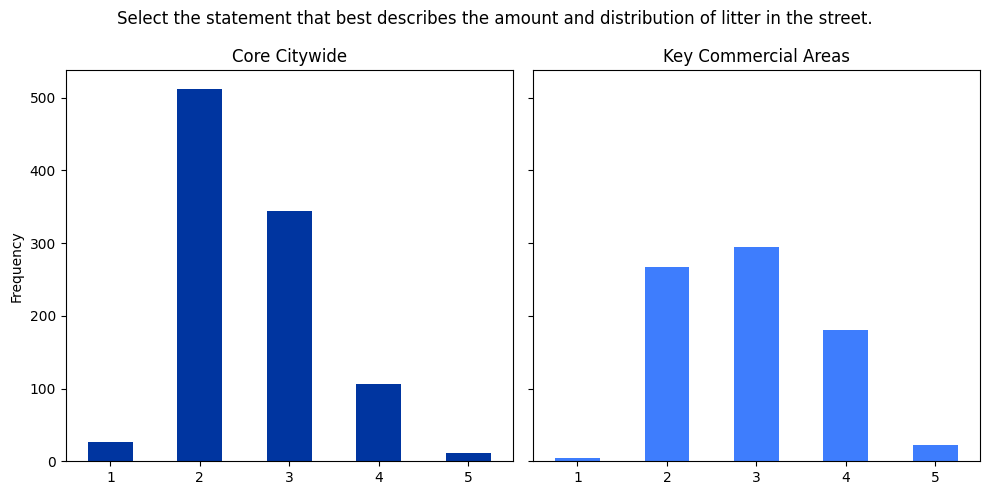

In [138]:
# Create variable to represent the long column name written in the form of a question
street_litter = 'Select the statement that best describes the amount and distribution of litter in the street.'

# Perform replication, save results onto table, and display results
results_overview.loc[0,[core, key]] = replicate_survey_results(street_litter, 'street_litter')

### 44% OF EVALUATIONS HAVE SIDEWALK LITTER
"Similar to street litter, 44% of the sampled sidewalks had moderate to severe levels of sidewalk litter in the Core Citywide Survey. However, there was much more sidewalk litter in Key Commercial Areas at 67%."

- sidewalk_litter_dist: Select the statement that best describes the amount and distribution of litter on the sidewalk.
- - Values: Sidewalk litter rated on a scale of 1-5. 
- - - 1 = None, 2 = A few traces, 3 = More than a few traces, but no accumulation, 4 = Distributed litter with some accumulation, 5 = Widespread litter with significant accumulation.

PARTIAL-SUCCESS: We found 48% sidewalk litter in Key Commercial Areas, which is close to the claimed 44%.
<br>
SUCCESS: We found 67% sidewalk litter in Core Citywide Survey as claimed. 


    48.10% sidewalk litter in Core Citywide Survey
    67.49% sidewalk litter in Key Commercial Areas
    


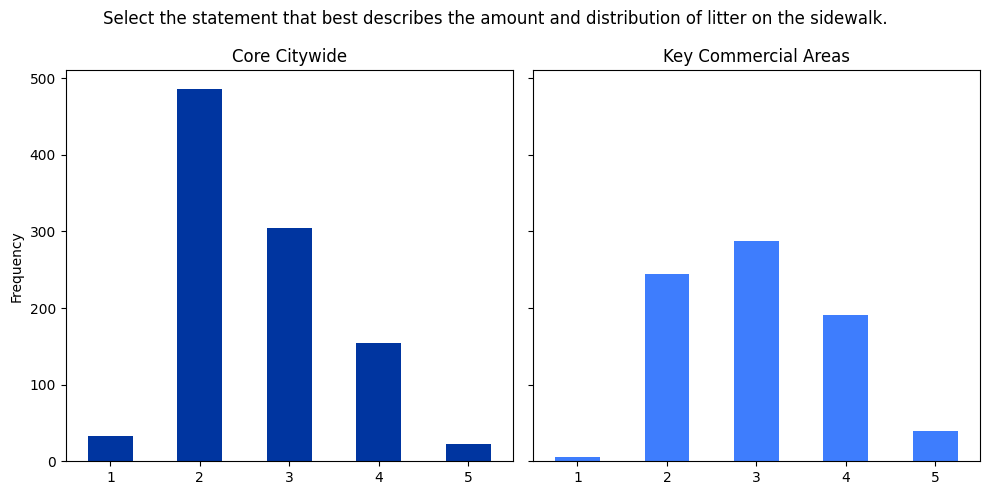

In [139]:
# Create variable to represent the long column name written in the form of a question
sidewalk_litter = 'Select the statement that best describes the amount and distribution of litter on the sidewalk.'

# Perform replication, save results onto table, and display results
results_overview.loc[1,[core, key]] = replicate_survey_results(sidewalk_litter, 'sidewalk_litter')

### 8% OF EVALUATED SIDEWALKS HAD OVERFLOWING TRASH
"On sidewalks that had a trash receptacle present, 8% of evaluations had overflowing trash in the Citywide survey. Similarly, 11% of evaluations in Key Commercial areas reported trash overflowing from receptacles."

- trash_overflow: Are any trash receptacles overflowing?
- - Values: Receptacles. If a trash receptacle is present, overflowing receptacles are represented by Yes or No. 
- - - 0 = "No" and 1 = "Yes".

SUCCESS: We found 9% trash overflow in Key Commercial Areas, which is close to the  claimed 8%.
<br>
SUCCESS: We found 10% trash overflow in Core Citywide Survey as opposed to the claimed 11%.

773 rows or 77.30% of core_citywide was empty
317 rows or 41.22% of key_comm_areas was empty

    8.81% trash overflow in Core Citywide Survey
    9.51% trash overflow in Key Commercial Areas
    


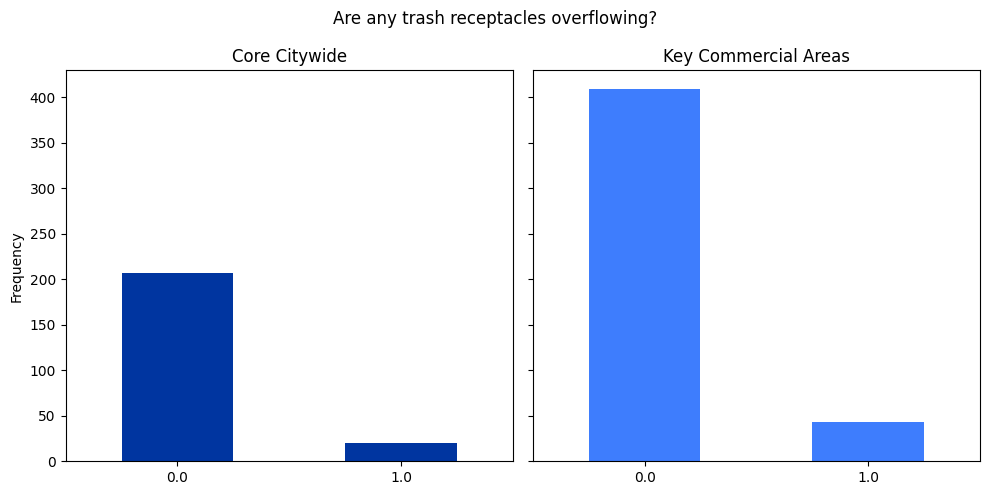

In [140]:
# Create variable to represent the long column name written in the form of a question
trash_overflow = 'Are any trash receptacles overflowing?'

# Perform replication, save results onto table, and display results
results_overview.loc[2,[core, key]] = replicate_survey_results(trash_overflow, 'trash_overflow')

### MORE THAN 30% OF EVALUATED SIDEWALKS HAD CLEARANCE ISSUES
"Citywide, 31% of evaluations had clearance issues; in Key Commercial areas, 12% of busy sidewalks had obstructed pathways. This means that someone walking around a residential area would be more likely to observe sidewalk clearance issues, like a fallen tree branch, compared to a commercial area."

- sidewalk_obstruction: Is sidewalk clearance less than 4 feet wide or 8 feet high at any point?
- - Values: Sidewalk clearance. Issues are represented by Yes and No. 
- - - 0 = "No" and 1 = "Yes".

SUCCESS: We found 39% sidewalk obstruction in Core Citywide Survey as claimed with "more than 30%".
<br>
SUCCESS: We found 14% sidewalk obstruction in Key Commercial Areas as claimed.


    39.10% sidewalk obstruction in Core Citywide Survey
    14.04% sidewalk obstruction in Key Commercial Areas
    


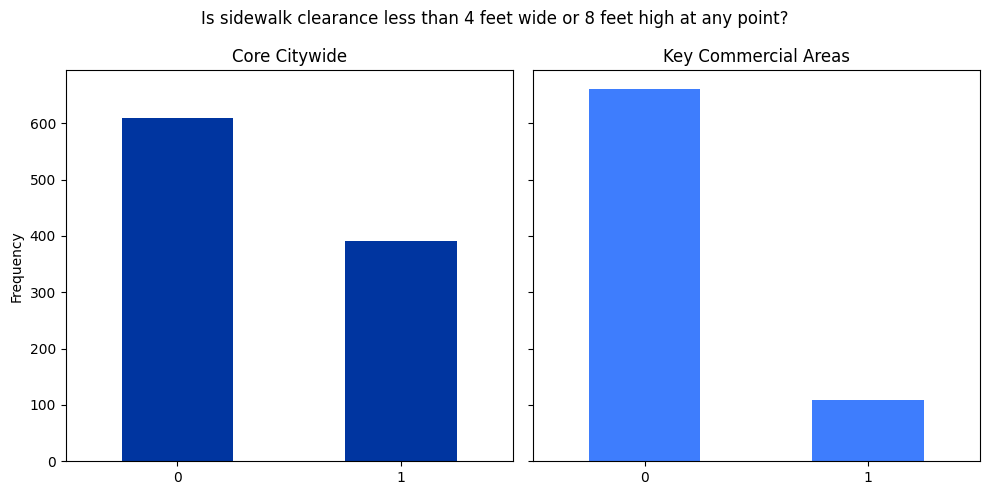

In [141]:
# Create variable to represent the long column name written in the form of a question
sidewalk_obstruction = 'Is sidewalk clearance less than 4 feet wide or 8 feet high at any point?'

# Perform replication, save results onto table, and display results
results_overview.loc[3,[core, key]] = replicate_survey_results(sidewalk_obstruction, 'sidewalk_obstruction')

### 75% OF EVALUATED SIDEWALKS HAVE MODERATE TO SEVERE PAVEMENT DEFECTS
"In the core Citywide sample, 75% of observations indicated moderate to severe defects in pavement conditions. The severity of pavement conditions was the same in commercial areas, with 75% of evaluations indicating moderate to severe pavement defects."

- pavement_defects: How severe are the pavement defects?
- - Values: Sidewalk defects. Sidewalk pavement defect severity is measured on a scale of 1-3.
- - - 1 = Minor, 2 = Moderate, 3 = Severe.

SUCCESS: We found 75% pavement defects in Core Citywide Survey as claimed.
<br>
SUCCESS: We found 75% pavement defects in Key Commercial Areas as claimed.

159 rows or 15.90% of core_citywide was empty
169 rows or 21.98% of key_comm_areas was empty

    75.98% pavement defects in Core Citywide Survey
    76.50% pavement defects in Key Commercial Areas
    


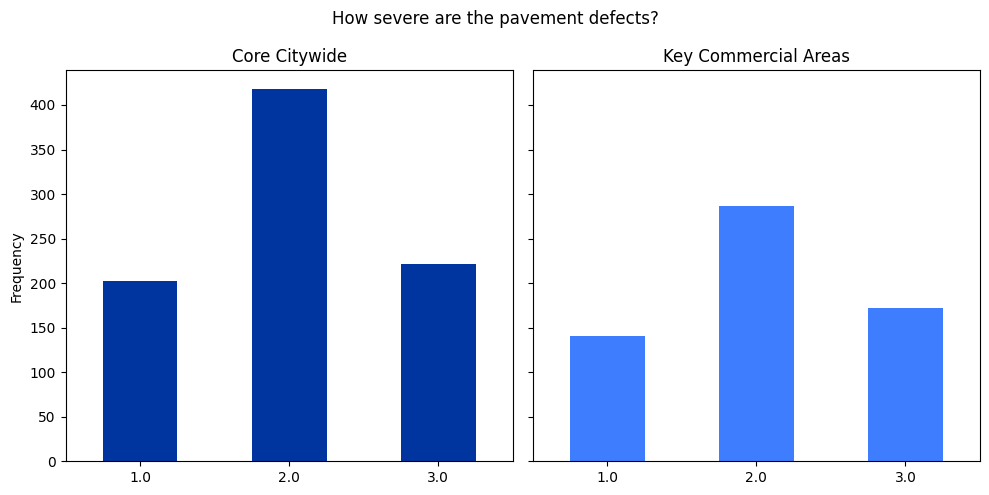

In [142]:
# Create variable to represent the long column name written in the form of a question
pavement_defects = 'How severe are the pavement defects?'

# Perform replication, save results onto table, and display results
results_overview.loc[4,[core, key]] = replicate_survey_results(pavement_defects, 'pavement_defects')

### MORE THAN 30% OF EVALUATIONS REPORT ILLEGAL DUMPING 
"More than 30% of evaluations in the Citywide Survey found illegal dumping, and nearly half of the evaluations in commercial areas."

- illegal_dumping: How many large abandoned items are present?
- - Values: The count of abandoned items represents instances of illegal dumping.

SUCCESS: We found 33% pavement defects in Core Citywide Survey as claimed with "more than 30%".
<br>
SUCCESS: We found 44% pavement defects in Key Commercial Areas as claimed with "nearly half".


    33.40% illegal dumping in Core Citywide Survey
    44.34% illegal dumping in Key Commercial Areas
    


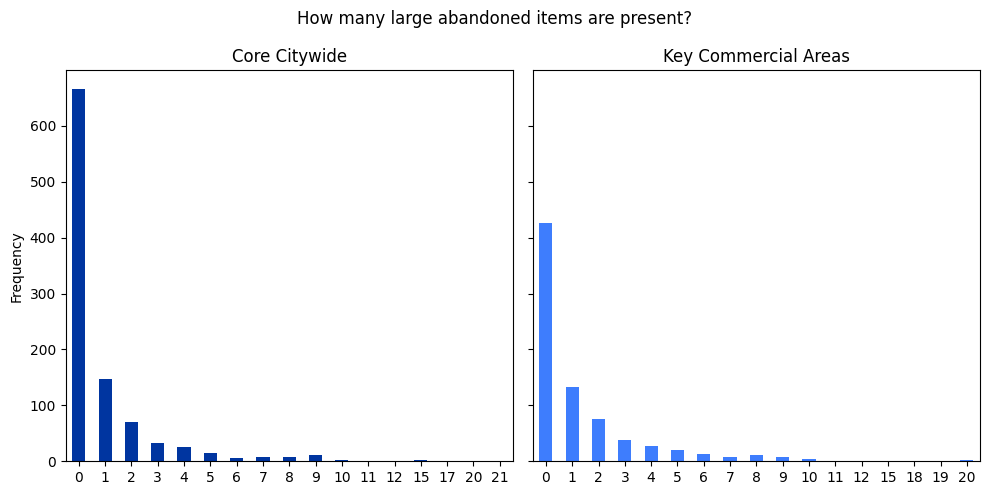

In [143]:
# Create variable to represent the long column name written in the form of a question
illegal_dumping = 'How many large abandoned items are present?'

# Perform replication, save results onto table, and display results
results_overview.loc[5,[core, key]] = replicate_survey_results(illegal_dumping, 'illegal_dumping')

### Note: Omitted due to unexplained meaning of "issue codes"
### MORE THAN 80% OF TRANSIT SHELTERS ON EVALUATED STREETS & SIDEWALKS HAD CLEANLINESS ISSUES
"About 83% of transit shelters in the Core Citywide survey had at least one type of cleanliness issue, such as litter, broken glasses, or illegal dumping, among other issues. Key Commercial Areas were much more likely to have transit shelters present, and of these, more than 90% had cleanliness issues."

- transit_shelter_cleanliness_issue: Select the statement that best describes the amount and distribution of broken glass on the street and sidewalk:
- - Values: 14. Transit shelters. If a shelter is present, please provide _issue codes_.
<br>
- transit_shelter: Transit shelters. Presence of a transit shelter is represented by Yes and No. 
- - Values: 0 = "No" and 1 = "Yes".

In [144]:
# transit_shelter_cleanliness_issue = 'Which of the following issues are present in or on any of the transit shelters along the route?'
# transit_shelter = 'Does the route have one or more transit shelters?' #subset
# replicate_survey_results(transit_shelter_cleanliness_issue, 'transit_shelter_cleanliness_issue', 
#                          subset=transit_shelter, all_except_zero=True)

### ABOUT 20% OF EVALUATED STREETS & SIDEWALKS HAVE GRAFFITI, BUT GRAFFITI MORE COMMON IN COMMERCIAL AREAS
"Citywide, 21% of evaluations found moderate to severe levels of graffiti. In contrast, commercial areas were far more likely to have moderate to severe graffiti at 71%."
- graffiti_instances: How many instances of graffiti are present on private property or on the sidewalk or non-painted curb immediately adjacent to private property?
- - Values: The number of instances of graffiti on private property are recorded here. In case more than 100 instances are present for a single evaluation, "101" is reported.
- graffiti_instances1: How many instances of graffiti are present on SF gov property?
- - Values: The number of instances of graffiti on SF gov property are recorded here. In case more than 100 instances are present for a single evaluation, "101" is reported.
- graffiti_instances2: How many instances of graffiti are present on other property?
- - Values: The number of instances of graffiti on other property are recorded here. In case more than 100 instances are present for a single evaluation, "101" is reported.

Reporting Categories:
- None-Minor 0-25 instances
- Moderate 26-100 instances
- Severe More than 100 instances

#### Note: It is not specified which of the three graffiti variables were used, so I will be using a new variable as proxy that takes the max value of the three for every row.

SUCCESS: We found 22% max graffiti instance in Core Citywide Survey, which is closed to the claimed 21%.
<br>
FAILURE: We found 54% max graffiti instance in Key Commercial Areas, which is close to the 71% claimed.

In [145]:
# Create variables to represent the long column names written in the form of questions
graffiti_instances = 'How many instances of graffiti are present on private property or on the sidewalk or non-painted curb immediately adjacent to private property?'
graffiti_instances1 = 'How many instances of graffiti are present on SF gov property?'
graffiti_instances2 = 'How many instances of graffiti are present on other property?'

graffiti_groups = [graffiti_instances, graffiti_instances1, graffiti_instances2]

In [146]:
# Create a new max_graffiti column and dataset to fit the format for the replication function
core_citywide_max_graffiti = core_citywide.copy()
key_comm_areas_max_graffiti = key_comm_areas.copy()
core_citywide_max_graffiti['max_graffiti_instance'] = core_citywide[graffiti_groups].max(axis=1) # takes the max of 3 values
key_comm_areas_max_graffiti['max_graffiti_instance'] = key_comm_areas_max_graffiti[graffiti_groups].max(axis=1) # takes the max of 3 values

# Define the bucket ranges and labels
bins = [0, 25, 100, float('inf')]
labels = [1, 2, 3]

# Create a new column 'bucketed_max_graffiti' with bucket labels
core_citywide_max_graffiti['max_graffiti_instance'] = pd.cut(core_citywide_max_graffiti['max_graffiti_instance'].astype(int), bins=bins, labels=labels)
key_comm_areas_max_graffiti['max_graffiti_instance'] = pd.cut(key_comm_areas_max_graffiti['max_graffiti_instance'].astype(int), bins=bins, labels=labels)

# Drop NaN values from the 'max_graffiti_instance' column
core_citywide_max_graffiti = core_citywide_max_graffiti.dropna(subset=['max_graffiti_instance'])
key_comm_areas_max_graffiti = key_comm_areas_max_graffiti.dropna(subset=['max_graffiti_instance'])


    21.75% max graffiti instance in Core Citywide Survey
    54.13% max graffiti instance in Key Commercial Areas
    


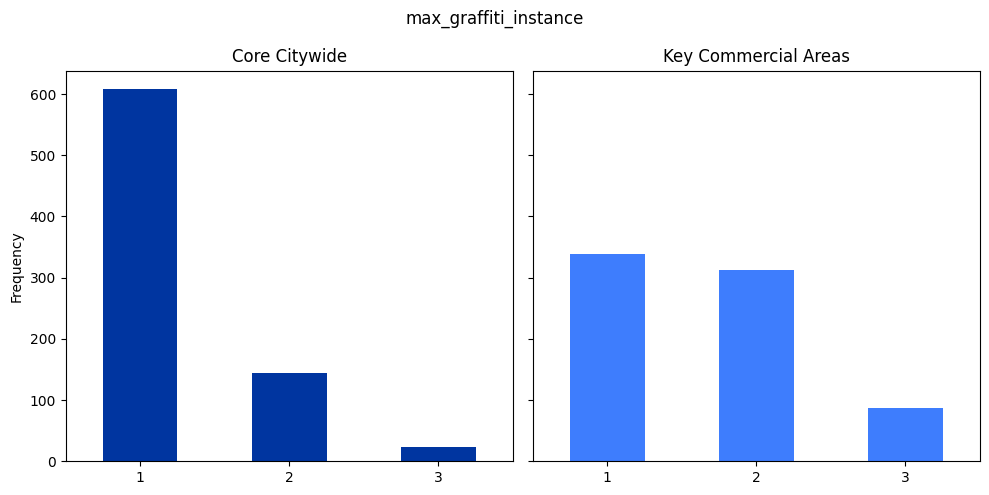

In [147]:
# Perform replication, save results onto table, and display results
results_overview.loc[12,[core, key]] = replicate_survey_results('max_graffiti_instance', 'max_graffiti_instance', 
                         core_df=core_citywide_max_graffiti, 
                         key_df=key_comm_areas_max_graffiti)

### ALMOST 50% OF CITY STREETS AND SIDEWALKS REPORT BROKEN GLASS
"47% of streets and sidewalks reported broken glass in the Citywide survey, while about 1% reported seeing syringes. Broken glass was also more likely to
be seen in commercial areas at 58%"

- broken_glass: Select the statement that best describes the amount and distribution of broken glass on the street and sidewalk:
- - Values: Measured on a scale of 1-5. 
- - - 1 = None, 2 = A few traces, 3 = More than a few traces but no concentration, 4 = Glass is concentrated in a single line or spot, 5 = Glass is concentrated in multiple lines or spots.

SUCCESS: We found 43% broken glass in Core Citywide Survey as claimed with "almost 50%".
<br>
SUCCESS: We found 58% broken glass in Key Commercial Areas as claimed.


    43.30% broken glass in Core Citywide Survey
    58.13% broken glass in Key Commercial Areas
    


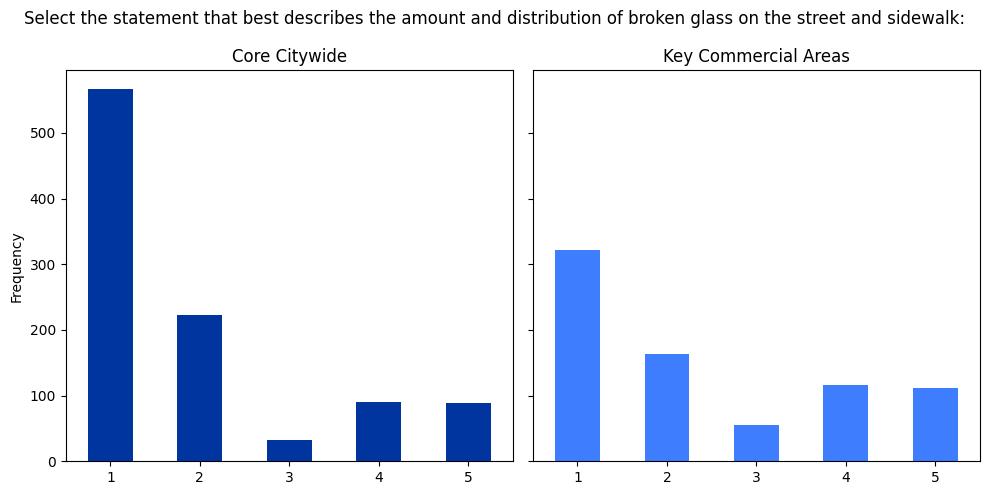

In [148]:
# Create variable to represent the long column name written in the form of a question
broken_glass = 'Select the statement that best describes the amount and distribution of broken glass on the street and sidewalk:'

# Perform replication, save results onto table, and display results
results_overview.loc[6,[core, key]] = replicate_survey_results(broken_glass, 'broken_glass', all_except_one=True)

### ABOUT 30% OF EVALUATED STREETS AND SIDEWALKS REPORT FECES
"About 30% of evaluations observing feces on the street or sidewalk. In contrast, almost half (47%) of evaluations in all Key Commercial Areas observed feces."

- feces: How many instances of feces are present?
- - Values: Count of instances/clusters.

SUCCESS: We found 26% feces in Core Citywide Survey as claimed with "about 30%".
<br>
SUCCESS: We found 44% feces in Key Commercial Areas as claimed iwth "almost half".


    25.50% feces in Core Citywide Survey
    44.34% feces in Key Commercial Areas
    


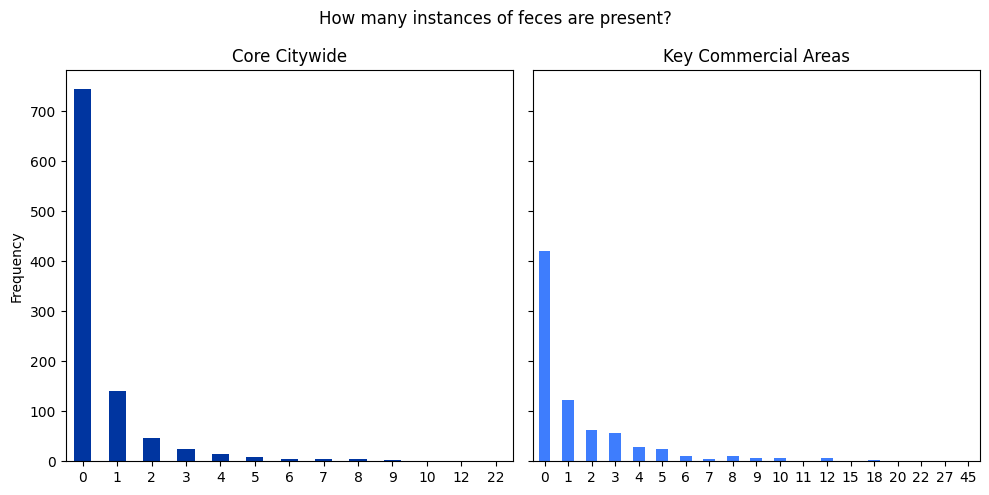

In [149]:
# Create variable to represent the long column name written in the form of a question
feces = 'How many instances of feces are present?'

# Perform replication, save results onto table, and display results
results_overview.loc[7,[core, key]] = replicate_survey_results(feces, 'feces', all_except_zero=True)

In [169]:
# Filter Results Overview table to only include the values computed for
exclude_from_results_overview = [8, 9, 10, 11, 13]
final_results_overview = results_overview.drop(exclude_from_results_overview)

# Set the index to 'Feature' column
final_results_overview.set_index('Feature', inplace=True)
final_results_overview.astype(float)

,Core Citywide Survey,Key Commercial Areas,Core Citywide Survey (Replicated),Key Commercial Areas (Replicated)
Feature,,,,
Street litter,41.0,64.0,46.0,65.0
Sidewalk litter,44.0,67.0,48.0,67.0
Overflowing trash receptacles,8.0,11.0,9.0,10.0
Sidewalk clearance,31.0,12.0,39.0,14.0
Sidewalk pavement defects,75.0,75.0,76.0,76.0
Illegal dumping,36.0,49.0,33.0,44.0
Broken glass,47.0,58.0,43.0,58.0
Feces,30.0,47.0,26.0,44.0
Graffiti,20.0,71.0,22.0,54.0


### Main findings vs Replicated findings

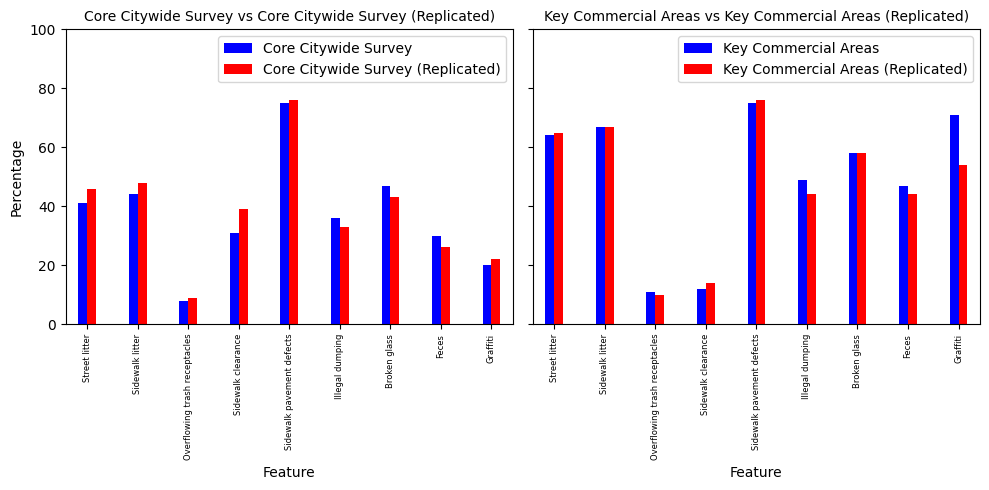

In [151]:
# Set the width of the bars
bar_width = 0.35

# Create the figure and axes for the plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True)

# Plot 1: Core Citywide Survey vs Core Citywide Survey (Replicated)
plot1_df = final_results_overview[['Core Citywide Survey', 'Core Citywide Survey (Replicated)']]
plot1_df.plot(kind='bar', ax=axes[0], width=bar_width, color=['blue', 'red'])
axes[0].set_title('Core Citywide Survey vs Core Citywide Survey (Replicated)', size=10)
axes[0].set_xlabel('Feature')
axes[0].set_ylabel('Percentage')
axes[0].set_xticklabels(plot1_df.index, size=6, rotation=90)
axes[0].set_ylim(0, 100)
axes[0].legend()

# Plot 2: Key Commercial Areas vs Key Commercial Areas (Replicated)
plot2_df = final_results_overview[['Key Commercial Areas', 'Key Commercial Areas (Replicated)']]
plot2_df.plot(kind='bar', ax=axes[1], width=bar_width, color=['blue', 'red'])
axes[1].set_title('Key Commercial Areas vs Key Commercial Areas (Replicated)', size=10)
axes[1].set_xlabel('Feature')
axes[1].set_xticklabels(plot2_df.index, size=6, rotation=90)
axes[1].set_ylim(0, 100)
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Transition into Regression
Although not crucial to the analyis, I visualized a sample of 450 points (roughly the max amount that didn't overwhelm my computer and produce and error) onto a map of San Francisco divided by the "Analysis Neighborhoods" column. This was made more as another usual visual guide of the dataset and natural transition to the next section of the notebook and analysis.

Note: Different city departments have different definitions of neighborhood boundaries and how many there are. Read more here. https://www.sfchronicle.com/projects/2022/san-francisco-neighborhoods/ For simplicity, I will be using using the only map the original data refers to in its metadata and that the report to refers to explicitly – the "Analysis Neighborhoods".

In [152]:
# SF Analysis Neighborhoods
# Source: https://data.sfgov.org/Geographic-Locations-and-Boundaries/Analysis-Neighborhoods/p5b7-5n3h
analysis_gdf = gpd.read_file('analysis_neighborhoods.shp')
analysis_gdf.head(n=3)

,nhood,geometry
0,Western Addition,"POLYGON ((-122.42144 37.78557, -122.42136 37.7..."
1,West of Twin Peaks,"POLYGON ((-122.46104 37.75096, -122.46055 37.7..."
2,Visitacion Valley,"POLYGON ((-122.40385 37.71883, -122.40355 37.7..."


In [45]:
len(eval_gdf_raw['Analysis Neighborhoods 2'].unique())

39

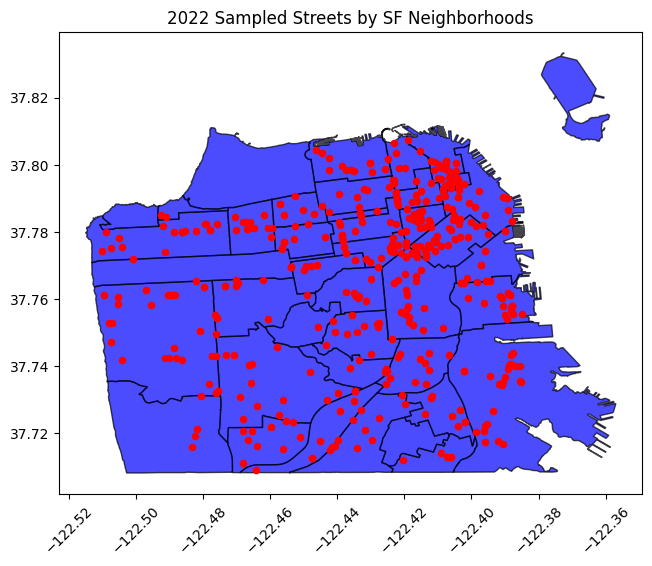

In [53]:
# Plot the polygons and points
fig, ax = plt.subplots(figsize=(8, 6))
analysis_gdf.plot(ax=ax, color='blue', edgecolor='black', alpha=0.7, label='Polygons')
eval_gdf.sample(n=450).plot(ax=ax, color='red', markersize=20, label='Points')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
ax.set_title('2022 Sampled Streets by SF Neighborhoods')
plt.show()

# Regression Analysis
The SF government conducts a biennial rating of neighborhoods according to different factors, including an average rating based on all these factors, and it is accessible online. The rating is determined by a weighted score of survey results from sampled residents who are asked a series of questions about their perception of different factors. One of the factors they test and rate for is the "Street and sidewalk ratings by neighborhood". 
Source: https://sf.gov/data/city-survey-streets-and-sidewalks

I want to know which variables are most important in indicating the score. To do that, I will copy only the relevant predictor variables onto a new table. Then, I'll create a new column neighborhood_street_and_sidewalk_rating that has our response variable. Finally, I'll fit a multiple linear regression using sm.OLS.

## Cleaning Data
Before we can run any regression on the data, we have to exclude all irrelevant variables. This refers to 
1) those that don't have clear instructions on the metadata nor the report on how to interpret their values like 'Which of the following issues are present in or on any of the transit shelters along the route?' or 'If yes, identify the cause (select all that apply)' and

2) those that are not indicators of an area's cleanliness like the ObjectID, CreationDate, or geometry.

Afterwards, we still have to deal with the empty values. Because there are several columns that have around 50% or more empty values, we cannot simply drop all the rows with empty values. Fortunately, the values all range from 0 to 5 so we are working with such a small range that are all within the same range of values. Finally, because we randomly sampled from the overall dataset, we can assume that the data is normally distributed. Thus, it makes sense to fill the empty values with the average value for that column. 

At the end, we create a new df that implements all those transformations for concision and easier coding later.

In [153]:
# Exclude columns that don't have clear instructions on how to interpret their values
# Exclude columns that are not indicators of an area's cleanliness
exclude_columns = ['ObjectID', 'Route Location:', 'Route ID:', 'Other dumped items:', 'If yes, identify the cause (select all that apply)', 'Other sidewalk obstructions:', 'Which of the following issues are present in or on any of the transit shelters along the route?','CreationDate', 'SF Find Neighborhoods 2', 'x', 'y', 'the_geom', 'Current Supervisor Districts 2', 'geometry']
selected_columns = [col for col in core_citywide.columns if col not in exclude_columns]
reg_gdf = core_citywide[selected_columns].copy()

reg_gdf.head(n=1)

,Select the statement that best describes the amount and distribution of litter in the street.,Does litter obstruct the street?,Select the statement that best describes the amount and distribution of litter on the sidewalk.,How many large abandoned items are present?,What types of items are present? (select all that apply),Does illegal dumping obstruct the street?,How many instances of graffiti are present on private property or on the sidewalk or non-painted curb immediately adjacent to private property?,How many instances of graffiti are present on SF gov property?,How many instances of graffiti are present on other property?,Select the statement that best describes the amount and distribution of broken glass on the street and sidewalk:,How many instances of broken glass are present along the sidewalk and street?,How many instances of feces are present?,How many abandoned syringes are present?,How many used or opened condoms are present?,How many dead animals are present?,Does the route have one or more trash receptacles?,Are any trash receptacles overflowing?,Is sidewalk clearance less than 4 feet wide or 8 feet high at any point?,Does the sidewalk have any defects that have not been marked for repair?,Does the sidewalk have any marked defects that have not been repaired?,How severe are the pavement defects?,Do you detect any strong unpleasant or offensive odors along the street or sidewalk?,"If yes, is the odor from a sewer or catch basin?",Does the route have one or more transit shelters?,Is this route predominantly residential or commercial/industrial/mixed use?,Analysis Neighborhoods 2
2369,2,0.0,2,1,5.0,0.0,0,0,0,1,NaN,0,0,0,0,0,NaN,1,1,1,3.0,0,NaN,0,2.0,14.0


In [154]:
# Simplify columns into snake case variable-like names
reg_gdf_cols = [
    'street_litter_dstr',
    'street_litter_obst',
    'sidewalk_litter_dstr',
    'large_abandoned_items_count',
    'items_type',
    'has_illegal_dump_obstruct_street',
    'private_property_graffiti_count',
    'gov_property_graffiti_count',
    'other_property_graffiti_count',
    'broken_glass_street_sidewalk_dstr',
    'broken_glass_street_sidewalk_count',
    'feces_count',
    'syringes_count',
    'condoms_count',
    'dead_animals_count',
    'has_trash_receptacles',
    'has_trash_receptacle_overflow',
    'sidewalk_clearance_obstructed',
    'has_sidewalk_unmarked_defects',
    'has_sidewalk_marked_defects',
    'pavement_defects',
    'has_foul_odors',
    'odor_from_sewer_or_basin',
    'has_transit_shelter',
    'key_comm_area',
    'Analysis Neighborhoods 2'
]

In [155]:
# Change column names for easier viewing and manipulation
reg_gdf.columns = reg_gdf_cols

In [156]:
# Analysis Neighborhoods 2 (Manually confirmed by graphing points and referring to location in SF gov map)
# Source: https://data.sfgov.org/Geographic-Locations-and-Boundaries/Analysis-Neighborhoods/p5b7-5n3h
neighborhood_dict = {
    1: "Bayview",
    2: "Bernal Heights",
    3: "Haight Ashbury",
    4: "Mission Bay",
    5: "Castro",
    6: "Chinatown",
    7: "Excelsior",
    8: "Financial District/South Beach",
    9: "Hayes Valley",
    10: "Glen Park",
    11: "Inner Richmond",
    #12: "Golden Gate Park",
    13: "Marina",
    14: "Inner Sunset",
    #15: "Japantown",
    16: "Lakeshore",
    #17: "Lincoln Park",
    18: "Lone Mountain/USF",
    20: "Mission",
    21: "Nob Hill",
    22: "Noe Valley",
    23: "North Beach",
    24: "Oceanview/Merced/Ingleside",
    25: "Portola",
    26: "Potrero Hill",
    28: "Outer Mission",
    29: "Outer Richmond",
    30: "Pacific Heights",
    31: "Presidio Heights",
    32: "Russian Hill",
    33: "Seacliff",
    34: "South of Market",
    35: "Sunset/Parkside",
    36: "Tenderloin",
    38: "Twin Peaks",
    39: "Western Addition",
    40: "Visitacion Valley",
    41: "West of Twin Peaks"
}

## Second Dataset: Neighborhood Ratings

In [157]:
# Analysis Neighborhoods 2 Scores
# Source: https://sf.gov/data/city-survey-streets-and-sidewalks

# "We filtered neighborhoods with fewer than 10 responses from results 
# "because results aren't reliable with that few responses, to maintain accuracy: 
neighborhood_scores = {
    "Bayview": 2.9,  # "Bayview Hunters Point"
    "Bernal Heights": 3.0,
    "Haight Ashbury": 3.2,
    "Mission Bay": 3.0,
    "Castro": 3.0,  # "Castro/Upper Market"
    "Chinatown": 3.5,
    "Excelsior": 3.2,
    "Financial District/South Beach": 2.8,
    "Hayes Valley": 3.0,
    "Glen Park": 3.4,
    "Inner Richmond": 2.8,
    #"Golden Gate Park": 3.0, # excluded
    "Marina": 3.0,
    "Inner Sunset": 3.3,
    #"Japantown": 3.0, # excluded
    "Lakeshore": 2.9,
    #"Lincoln Park": 2.9, # excluded
    "Lone Mountain/USF": 3.1,
    "Mission": 2.9,
    "Nob Hill": 3.0,
    "Noe Valley": 3.3,
    "North Beach": 3.1,
    "Oceanview/Merced/Ingleside": 3.4,
    "Portola": 3.1,
    "Potrero Hill": 3.2,
    "Outer Mission": 3.0,
    "Outer Richmond": 2.8,
    "Pacific Heights": 3.0,
    "Presidio Heights": 3.4,
    "Russian Hill": 3.0,
    "Seacliff": 2.7,
    "South of Market": 2.7,
    "Sunset/Parkside": 3.1,
    "Tenderloin": 2.3,
    "Twin Peaks": 3.1,
    "Western Addition": 2.8,
    "Visitacion Valley": 2.9,
    "West of Twin Peaks": 3.2
}

In [158]:
# Drop rows where 'Analysis Neighborhoods 2' is not in neighborhood_dict
reg_gdf_rating = reg_gdf[reg_gdf['Analysis Neighborhoods 2'].isin(neighborhood_dict)].copy()

# Map the values in 'Analysis Neighborhoods 2' to neighborhood names using neighborhood_dict
reg_gdf_rating['Analysis Neighborhoods 2'] = reg_gdf_rating['Analysis Neighborhoods 2'].map(neighborhood_dict)

# Create the new column 'neighborhood_street_and_sidewalk_rating'
reg_gdf_rating['neighborhood_street_and_sidewalk_rating'] = reg_gdf_rating['Analysis Neighborhoods 2'].map(neighborhood_scores)

# Drop 'Analysis Neighborhoods 2' as we won't be needing it for the regression
reg_gdf_rating = reg_gdf_rating.drop(columns=['Analysis Neighborhoods 2'])

In [159]:
reg_gdf_rating.head(n=3)

,street_litter_dstr,street_litter_obst,sidewalk_litter_dstr,large_abandoned_items_count,items_type,has_illegal_dump_obstruct_street,private_property_graffiti_count,gov_property_graffiti_count,other_property_graffiti_count,broken_glass_street_sidewalk_dstr,broken_glass_street_sidewalk_count,feces_count,syringes_count,condoms_count,dead_animals_count,has_trash_receptacles,has_trash_receptacle_overflow,sidewalk_clearance_obstructed,has_sidewalk_unmarked_defects,has_sidewalk_marked_defects,pavement_defects,has_foul_odors,odor_from_sewer_or_basin,has_transit_shelter,key_comm_area,neighborhood_street_and_sidewalk_rating
2369,2,0.0,2,1,5.0,0.0,0,0,0,1,NaN,0,0,0,0,0,NaN,1,1,1,3.0,0,NaN,0,2.0,3.3
2162,3,0.0,3,0,NaN,NaN,3,22,2,5,2.0,0,0,0,0,0,NaN,0,1,0,1.0,0,NaN,0,2.0,3.0
2398,3,0.0,2,0,NaN,NaN,0,0,1,4,1.0,0,0,0,0,1,0.0,1,1,1,3.0,0,NaN,0,2.0,2.8


In [160]:
# Create a new dataset that has the NaN values filled in each column with the corresponding mean value
df = reg_gdf_rating.fillna(reg_gdf_rating.mean()).copy()

## Correlation Analysis
We can conduct a correlation analysis before our regression to determine which variables to cut to minimize autocorrelation. We'll want to consider leaving only one of two variables that show at least a moderate correlation.

Remember this is how we can interpret correlation values (here's one from many sources that say so https://www.researchgate.net/figure/22-Strength-value-of-Correlation-Coefficient_tbl3_309209846)
- 0 shows no correlation
- |0 to 0.3| means a very weak correlation
- |0.31 to 0.5| means a weak correlation
- |0.51 to 0.7| means a moderate correlation
- |0.71 to 0.9| means a strong correlation
- |0.9 to 1| means a very strong correlation

We can observe a few things from the correlation plot below.
- at 0.63, street_litter_dstr and street_litter_dstr are moderately positively correlated
- at 0.58, gov_property_graffiti_count is moderately positively correlated with private_property_graffiti_count
- at 0.47, other_property_graffit_count is weakly positively correlated with private_property_graffiti_count
- at 0.42, other_property_graffit_count is weakly positively correlated with gov_property_graffiti_count

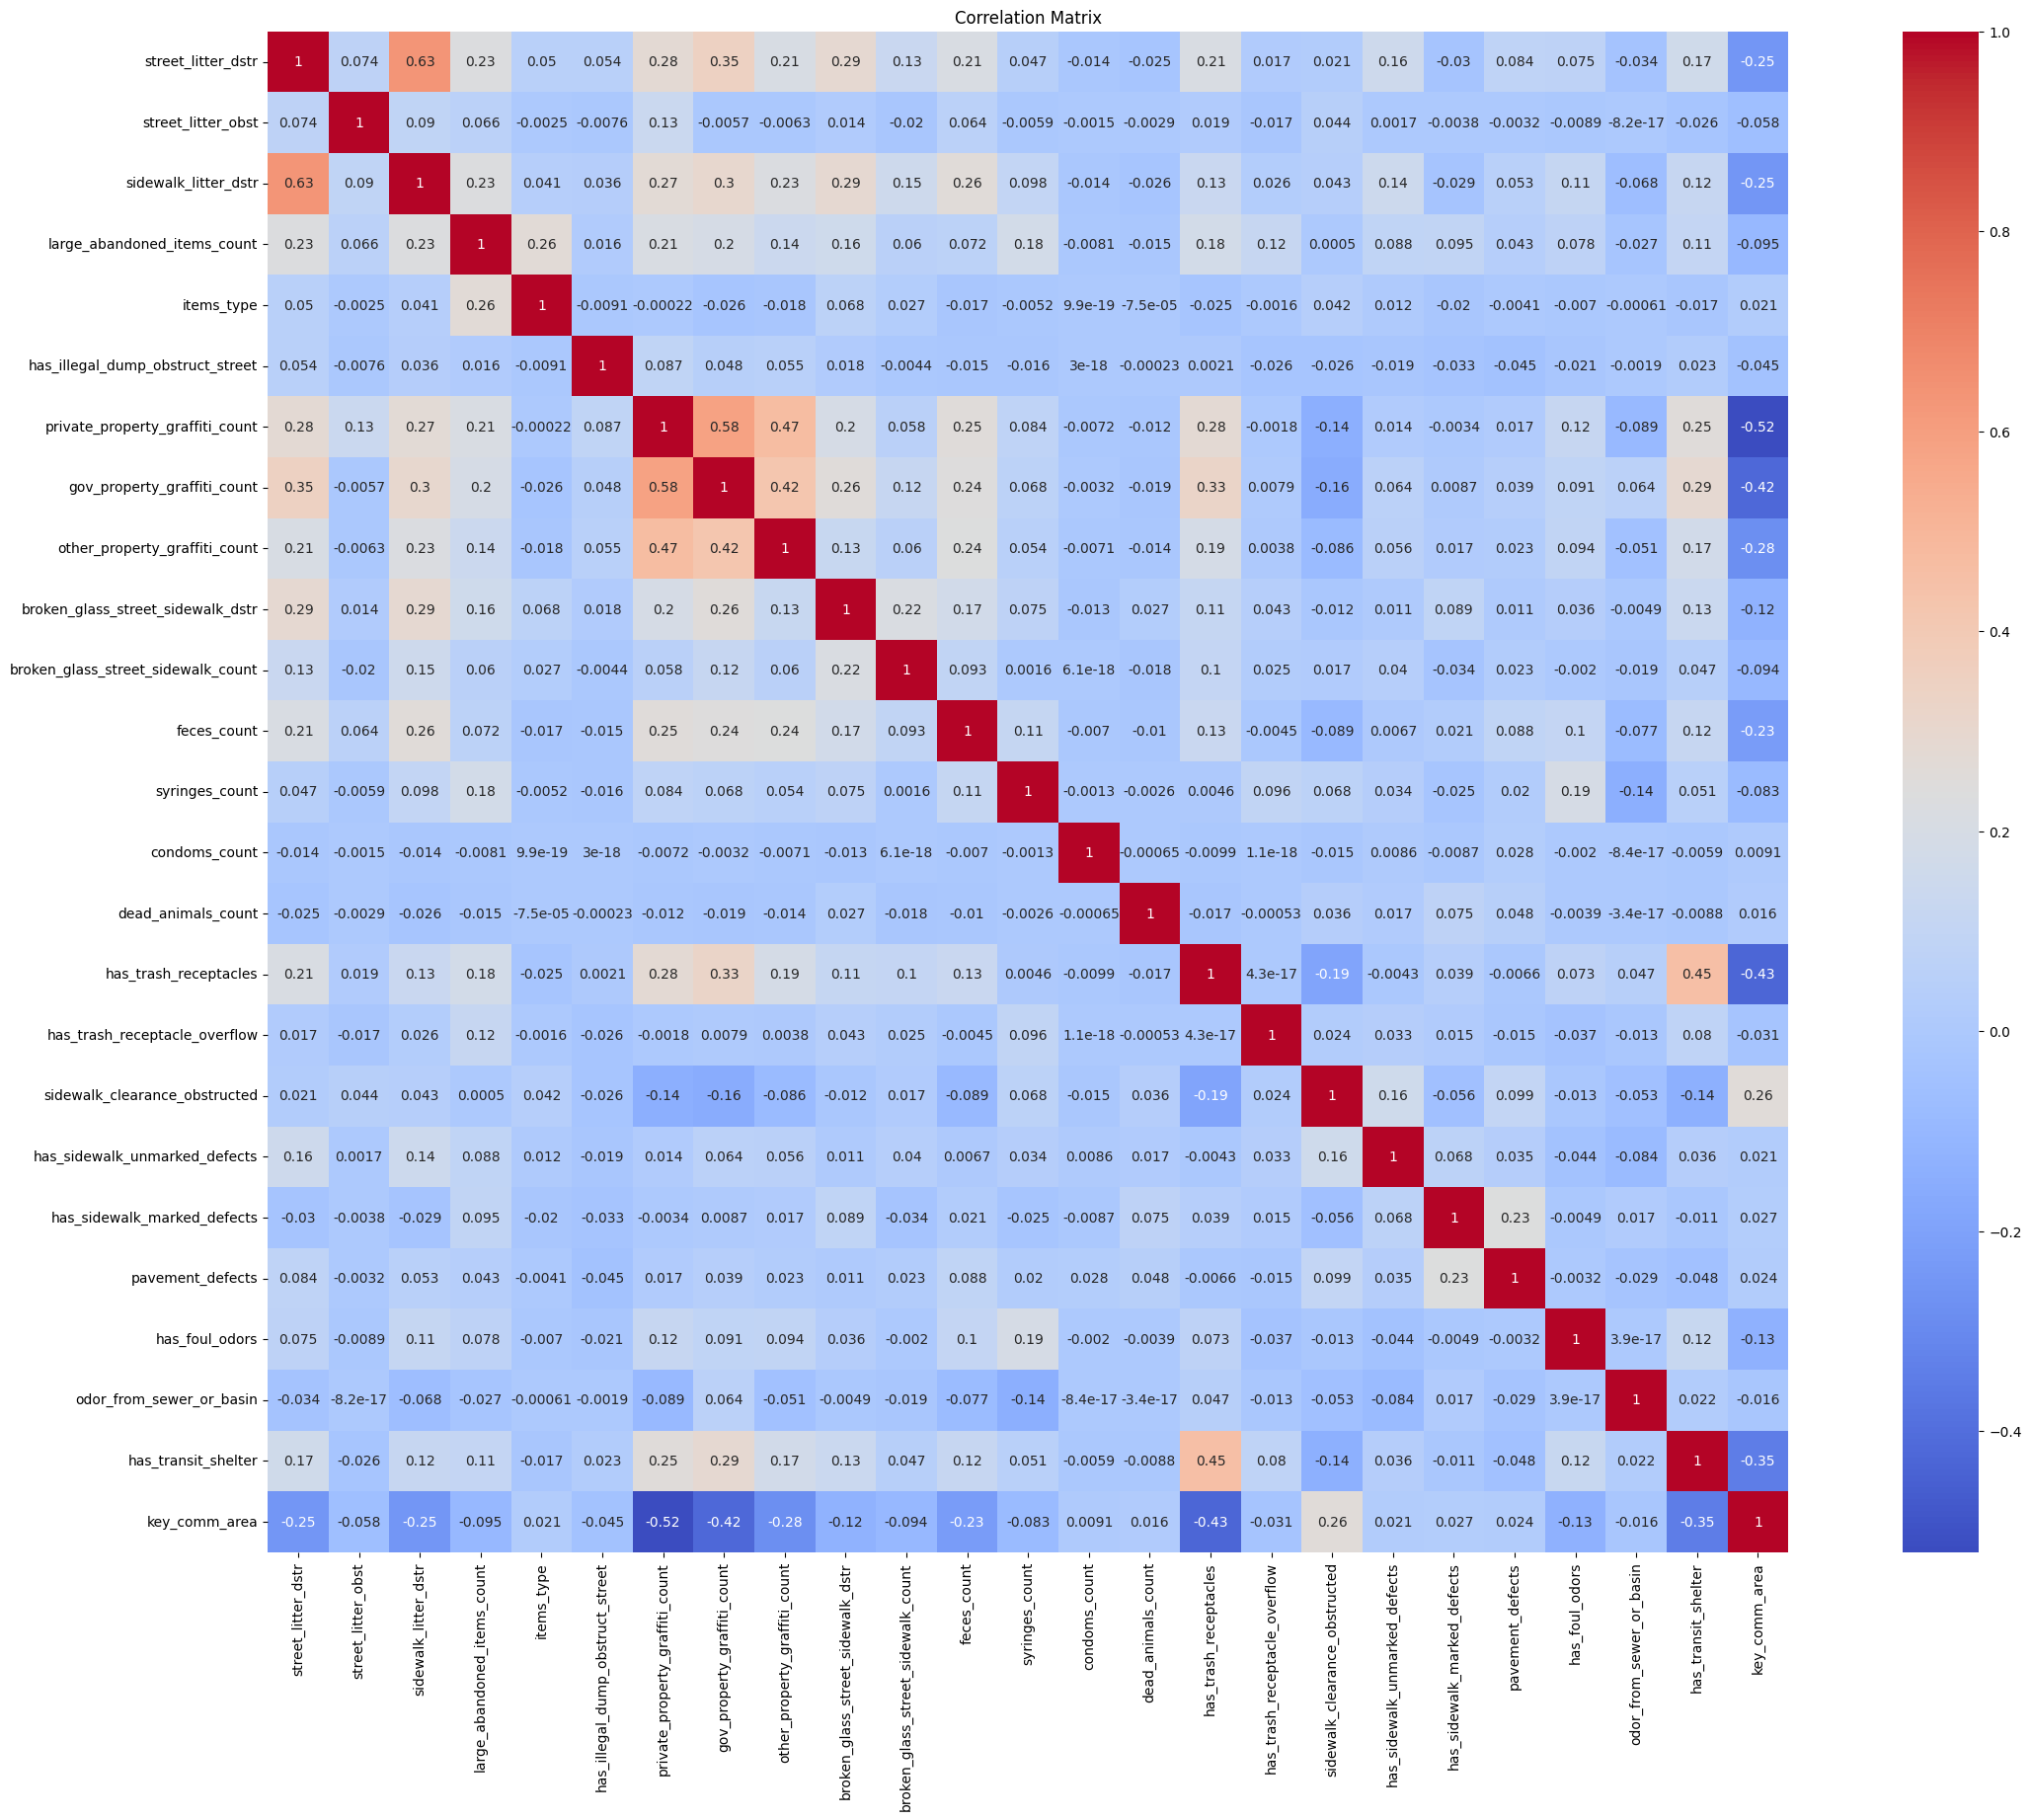

In [162]:
# Define the response column
y_variable = 'neighborhood_street_and_sidewalk_rating'

# Calculate correlation matrix using pandas method
corr_matrix = df.drop(y_variable, axis=1).corr()

# Create correlation plot
plt.figure(figsize=(30, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, annot_kws={'fontsize': 10})
plt.title('Correlation Matrix')
plt.show()

## Multiple Linear Regression
We'll create 5 multiple linear regression models. For each model, I'll create and evaluate scattered plots with a line of best fit as well as diagnostic plots. We find that none of them are actually particularly good because of their low Adj. R-squared values, and none of the models are that much better than the others.

- Model 1: All predictor variables
- Model 2: Predictor variables with p-value less than 0.05 according to Model1
- Model 3: Predictor variables cut according to correlation plot results
- Model 4: Predictor variables with p-value less than 0.05 according to Model3
- Model 5: Final variables are determined by Backwards Stepwise Regression

### Model 1

In [163]:
import pandas as pd
import statsmodels.api as sm

# Define the response column
y_variable = 'neighborhood_street_and_sidewalk_rating'

# Define the response variable and predictor variables
X1 = df.drop(columns=[y_variable])
y = df[y_variable]

# Add a constant term to the predictor variables
X1 = sm.add_constant(X1)

# Fit the multivariable regression model
model1 = sm.OLS(y, X1).fit()

# Get the results of the regression results
results1 = model1.summary()
results1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                      
===================================================================================================
Dep. Variable:     neighborhood_street_and_sidewalk_rating   R-squared:                       0.145
Model:                                                 OLS   Adj. R-squared:                  0.123
Method:                                      Least Squares   F-statistic:                     6.538
Date:                                     Thu, 17 Aug 2023   Prob (F-statistic):           2.59e-20
Time:                                             19:45:49   Log-Likelihood:                 257.60
No. Observations:                                      991   AIC:                            -463.2
Df Residuals:                                          965   BIC:                            -335.8
Df Model:                                               25                                         
Covariance Type:                                 nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  3.0868      0.067     46.405      0.000       2.956       3.217
street_litter_dstr                    -0.0282      0.011     -2.641      0.008      -0.049      -0.007
street_litter_obst                    -0.0788      0.080     -0.981      0.327      -0.236       0.079
sidewalk_litter_dstr                  -0.0124      0.009     -1.306      0.192      -0.031       0.006
large_abandoned_items_count           -0.0007      0.003     -0.209      0.835      -0.007       0.005
items_type                         -3.896e-16   8.46e-16     -0.460      0.645   -2.05e-15    1.27e-15
has_illegal_dump_obstruct_street       0.0006      0.064      0.009      0.993      -0.126       0.127
private_property_graffiti_count        0.0003      0.000      0.697      0.486      -0.001       0.001
gov_property_graffiti_count           -0.0010      0.000     -2.578      0.010      -0.002      -0.000
other_property_graffiti_count          0.0007      0.001      0.937      0.349      -0.001       0.002
broken_glass_street_sidewalk_dstr     -0.0123      0.005     -2.439      0.015      -0.022      -0.002
broken_glass_street_sidewalk_count    -0.0002      0.003     -0.060      0.952      -0.006       0.006
feces_count                           -0.0167      0.004     -3.865      0.000      -0.025      -0.008
syringes_count                        -0.0460      0.023     -1.990      0.047      -0.091      -0.001
condoms_count                          0.0529      0.109      0.484      0.629      -0.162       0.267
dead_animals_count                     0.0043      0.005      0.907      0.364      -0.005       0.014
has_trash_receptacles                 -0.0171      0.018     -0.971      0.332      -0.052       0.017
has_trash_receptacle_overflow         -0.0254      0.045     -0.562      0.574      -0.114       0.063
sidewalk_clearance_obstructed         -0.0020      0.013     -0.150      0.881      -0.028       0.024
has_sidewalk_unmarked_defects          0.0119      0.016      0.734      0.463      -0.020       0.044
has_sidewalk_marked_defects            0.0035      0.016      0.212      0.832      -0.029       0.036
pavement_defects                       0.0201      0.010      2.066      0.039       0.001       0.039
has_foul_odors                        -0.0347      0.057     -0.609      0.543      -0.147       0.077
odor_from_sewer_or_basin              -0.0454      0.119     -0.382      0.702      -0.279       0.188
has_transit_shelter                   -0.0143      0.024     -0.597    

### Model 2
If we filter for variables with p<0.05, then we only make a slight improvement to our Adj R at 0.154.

In [164]:
# Extract p-values from Model 1
p_values1 = model1.pvalues

# Set a significance level (e.g., 0.05)
significance_level = 0.05

# Select predictor variables based on Model 1's p-values
X2_variables = p_values1[p_values1 < significance_level].index
X2 = X1[X2_variables]

# Fit Model 2 with selected predictor variables
model2 = sm.OLS(y, X2).fit()

# Get the results of the Model 2
results2 = model2.summary()
results2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                      
===================================================================================================
Dep. Variable:     neighborhood_street_and_sidewalk_rating   R-squared:                       0.137
Model:                                                 OLS   Adj. R-squared:                  0.131
Method:                                      Least Squares   F-statistic:                     22.25
Date:                                     Thu, 17 Aug 2023   Prob (F-statistic):           4.74e-28
Time:                                             19:45:50   Log-Likelihood:                 252.93
No. Observations:                                      991   AIC:                            -489.9
Df Residuals:                                          983   BIC:                            -450.7
Df Model:                                                7                                         
Covariance Type:                                 nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 3.0489      0.043     70.626      0.000       2.964       3.134
street_litter_dstr                   -0.0361      0.009     -4.145      0.000      -0.053      -0.019
gov_property_graffiti_count          -0.0009      0.000     -2.625      0.009      -0.002      -0.000
broken_glass_street_sidewalk_dstr    -0.0134      0.005     -2.751      0.006      -0.023      -0.004
feces_count                          -0.0169      0.004     -4.037      0.000      -0.025      -0.009
syringes_count                       -0.0487      0.022     -2.229      0.026      -0.092      -0.006
pavement_defects                      0.0228      0.009      2.457      0.014       0.005       0.041
key_comm_area                         0.0569      0.017      3.376      0.001       0.024       0.090
==============================================================================
Omnibus:                        4.241   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.120   Jarque-Bera (JB):                4.811
Skew:                          -0.055   Prob(JB):                       0.0902
Kurtosis:                       3.323   Cond. No.                         181.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 3
Here's a reminder of our correlation results.
- at 0.6, street_litter_dstr and street_litter_dstr are moderately positively correlated
- at 0.56, gov_property_graffiti_count is moderately positively correlated with private_property_graffiti_count
- at 0.48, other_property_graffiti_count is weakly positively correlated with gov_property_graffiti_count
- at 0.45, other_property_graffiti_count is weakly positively correlated with private_property_graffiti_count

Because our predictor variable is a rating of the streets and sidewalks according to public perception, the public is more likely to perceive sidewalk litter than street litter, so we remove street litter. 
Between the 3 graffiti variables, people are likely to be more bothered by graffiti on private_property as an indicator of (a lack of) cleanliness so we will remove the two others.

Unsurprisingly, the Adjusted R-squared is lower. It's likely that the other variables, though slightly redundant, were strong indicators for the response variable.

In [165]:
# Define the response variables
X3 = df.drop(columns=[y_variable, 'sidewalk_litter_dstr', 'other_property_graffiti_count', 'gov_property_graffiti_count'])

# Add a constant term to the predictor variables
X3 = sm.add_constant(X3)

# Fit the multivariable regression model
model3 = sm.OLS(y, X3).fit()

# Get the results of Model 3
results3 = model3.summary()
results3

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                      
===================================================================================================
Dep. Variable:     neighborhood_street_and_sidewalk_rating   R-squared:                       0.137
Model:                                                 OLS   Adj. R-squared:                  0.117
Method:                                      Least Squares   F-statistic:                     6.989
Date:                                     Thu, 17 Aug 2023   Prob (F-statistic):           6.04e-20
Time:                                             19:45:50   Log-Likelihood:                 253.11
No. Observations:                                      991   AIC:                            -460.2
Df Residuals:                                          968   BIC:                            -347.5
Df Model:                                               22                                         
Covariance Type:                                 nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  3.0871      0.065     47.302      0.000       2.959       3.215
street_litter_dstr                    -0.0382      0.009     -4.247      0.000      -0.056      -0.021
street_litter_obst                    -0.0653      0.079     -0.826      0.409      -0.220       0.090
large_abandoned_items_count           -0.0013      0.003     -0.423      0.673      -0.007       0.005
items_type                         -1.958e-16   8.47e-16     -0.231      0.817   -1.86e-15    1.47e-15
has_illegal_dump_obstruct_street       0.0025      0.065      0.039      0.969      -0.124       0.129
private_property_graffiti_count     -7.52e-05      0.000     -0.186      0.853      -0.001       0.001
broken_glass_street_sidewalk_dstr     -0.0144      0.005     -2.872      0.004      -0.024      -0.005
broken_glass_street_sidewalk_count    -0.0007      0.003     -0.232      0.817      -0.007       0.005
feces_count                           -0.0177      0.004     -4.155      0.000      -0.026      -0.009
syringes_count                        -0.0477      0.023     -2.060      0.040      -0.093      -0.002
condoms_count                          0.0520      0.110      0.475      0.635      -0.163       0.267
dead_animals_count                     0.0045      0.005      0.939      0.348      -0.005       0.014
has_trash_receptacles                 -0.0190      0.018     -1.084      0.279      -0.054       0.015
has_trash_receptacle_overflow         -0.0240      0.045     -0.530      0.596      -0.113       0.065
sidewalk_clearance_obstructed          0.0015      0.013      0.113      0.910      -0.025       0.028
has_sidewalk_unmarked_defects          0.0085      0.016      0.526      0.599      -0.023       0.040
has_sidewalk_marked_defects            0.0047      0.016      0.286      0.775      -0.028       0.037
pavement_defects                       0.0201      0.010      2.071      0.039       0.001       0.039
has_foul_odors                        -0.0359      0.057     -0.627      0.531      -0.148       0.076
odor_from_sewer_or_basin              -0.0852      0.119     -0.716      0.474      -0.319       0.148
has_transit_shelter                   -0.0175      0.024     -0.733      0.464      -0.064       0.029
key_comm_area                          0.0551      0.020      2.798      0.005       0.016       0.094
==============================================================================
Omnibus:                        9.345   Durbin-Watson:                   1.983
Prob(Omnibus):  

### Model 4
Similarly to Model 2, if we filter variables with p<0.05, our new model only slightly increases Adj R to 0.140.

In [166]:
# Extract p-values from Model 3
p_values3 = model3.pvalues

# Select predictor variables based on Model 3's p-values
X4_variables = p_values3[p_values3 < significance_level].index
X4 = X3[X4_variables]

# Fit the Model 4 with selected predictor variables
model4 = sm.OLS(y, X4).fit()

# Get the summary of the Model 4
results4 = model4.summary()
results4

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                      
===================================================================================================
Dep. Variable:     neighborhood_street_and_sidewalk_rating   R-squared:                       0.131
Model:                                                 OLS   Adj. R-squared:                  0.125
Method:                                      Least Squares   F-statistic:                     24.66
Date:                                     Thu, 17 Aug 2023   Prob (F-statistic):           2.52e-27
Time:                                             19:45:50   Log-Likelihood:                 249.47
No. Observations:                                      991   AIC:                            -484.9
Df Residuals:                                          984   BIC:                            -450.6
Df Model:                                                6                                         
Covariance Type:                                 nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 3.0289      0.043     71.068      0.000       2.945       3.113
street_litter_dstr                   -0.0409      0.009     -4.789      0.000      -0.058      -0.024
broken_glass_street_sidewalk_dstr    -0.0153      0.005     -3.183      0.002      -0.025      -0.006
feces_count                          -0.0181      0.004     -4.342      0.000      -0.026      -0.010
syringes_count                       -0.0493      0.022     -2.249      0.025      -0.092      -0.006
pavement_defects                      0.0223      0.009      2.392      0.017       0.004       0.041
key_comm_area                         0.0722      0.016      4.551      0.000       0.041       0.103
==============================================================================
Omnibus:                        8.221   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               10.663
Skew:                          -0.084   Prob(JB):                      0.00484
Kurtosis:                       3.480   Cond. No.                         33.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 5
Now, we're going to try a backwards stepwise regression. Note that it only slightly improves the result from the highest Adj R in Models 1 and 2.

In [167]:
# Define your response variable (y) and predictor variables (X)
X5 = df.drop(columns=[y_variable])

# Add a constant term to the predictor variables
X = sm.add_constant(X5)

# Initialize the list of selected predictor variables
selected_vars = list(X.columns)

# Perform backward stepwise regression
max_adj_r2 = -float('inf')  # Initialize with negative infinity
final_model = None
loop_count = 0  # Initialize the loop counter

while len(selected_vars) > 0:
    # Fit the model
    model5 = sm.OLS(y, X[selected_vars]).fit()
    
    # Calculate adjusted R-squared
    adj_r2 = model5.rsquared_adj
    
    # Check if the current model has a higher adjusted R-squared
    if adj_r2 > max_adj_r2:
        max_adj_r2 = adj_r2
        worst_var = None
        
        # Find the predictor with the highest p-value
        worst_var = model5.pvalues.idxmax()
        
        # Remove the worst predictor from the selected list
        selected_vars.remove(worst_var)
    else:
        break
    
    loop_count += 1  # Increment the loop counter

# Print the final model summary
print(model5.summary())

# Print the number of loops
print(f"Number of loops: {loop_count}")

                                       OLS Regression Results                                      
Dep. Variable:     neighborhood_street_and_sidewalk_rating   R-squared:                       0.140
Model:                                                 OLS   Adj. R-squared:                  0.132
Method:                                      Least Squares   F-statistic:                     17.68
Date:                                     Thu, 17 Aug 2023   Prob (F-statistic):           2.28e-27
Time:                                             19:45:51   Log-Likelihood:                 254.56
No. Observations:                                      991   AIC:                            -489.1
Df Residuals:                                          981   BIC:                            -440.1
Df Model:                                                9                                         
Covariance Type:                                 nonrobust                                         


## Scatter plots and Diagnostic plots (QQ and Residual)
Below we have a 3x5 subplot. Every column holds chart figures for each model. For each model, there are three rows of figures: a scatter plot of the actual values vs the predicted values, a Q-Q plot, and a plot of the predicted against the residuals.

All plots are pretty much exactly the same. This, along with the minute deviations between the Adjusted R-squared values, as well as the low scores overall, tells us that none of the variables are actually great predictors. 

For the scatter plot, we can observe a distinct pattern that separates the values by clear intervals of 0.1. This makes sense given that the neighborhood ratings from 1-5 aren’t continuous, rather scores rounded up to the 1st decimal place. The values range from around 2.4 to 3.5 and they don’t closely follow the fitted line. All this indicates either one of two things: that the multiple linear regression is not the best algorithm for this dataset, or that the fundamental assumption that our predictor variables can actually explain the response variable is weak. This is further supported by the residual plot, which shows some type of pattern and clustering within the predicted values of 2.8 to 3.2. A good residual plot would have a more evenly scatter plot. 

The plots here with the most reassuring results are the Q-Q plots. Q-Q plots tell us about the validity of the assumption we make about the datasets distribution being normal such that a roughly straight indicates normal distribution. Earlier while cleaning the data, in order to fill in the empty values, I had to assume no skew and a pretty normal distribution. After sampling the dataset to create the “Core Citywide Survey” and “Key Commercial Areas” subsets, this is how I likely guaranteed the data’s normality. 

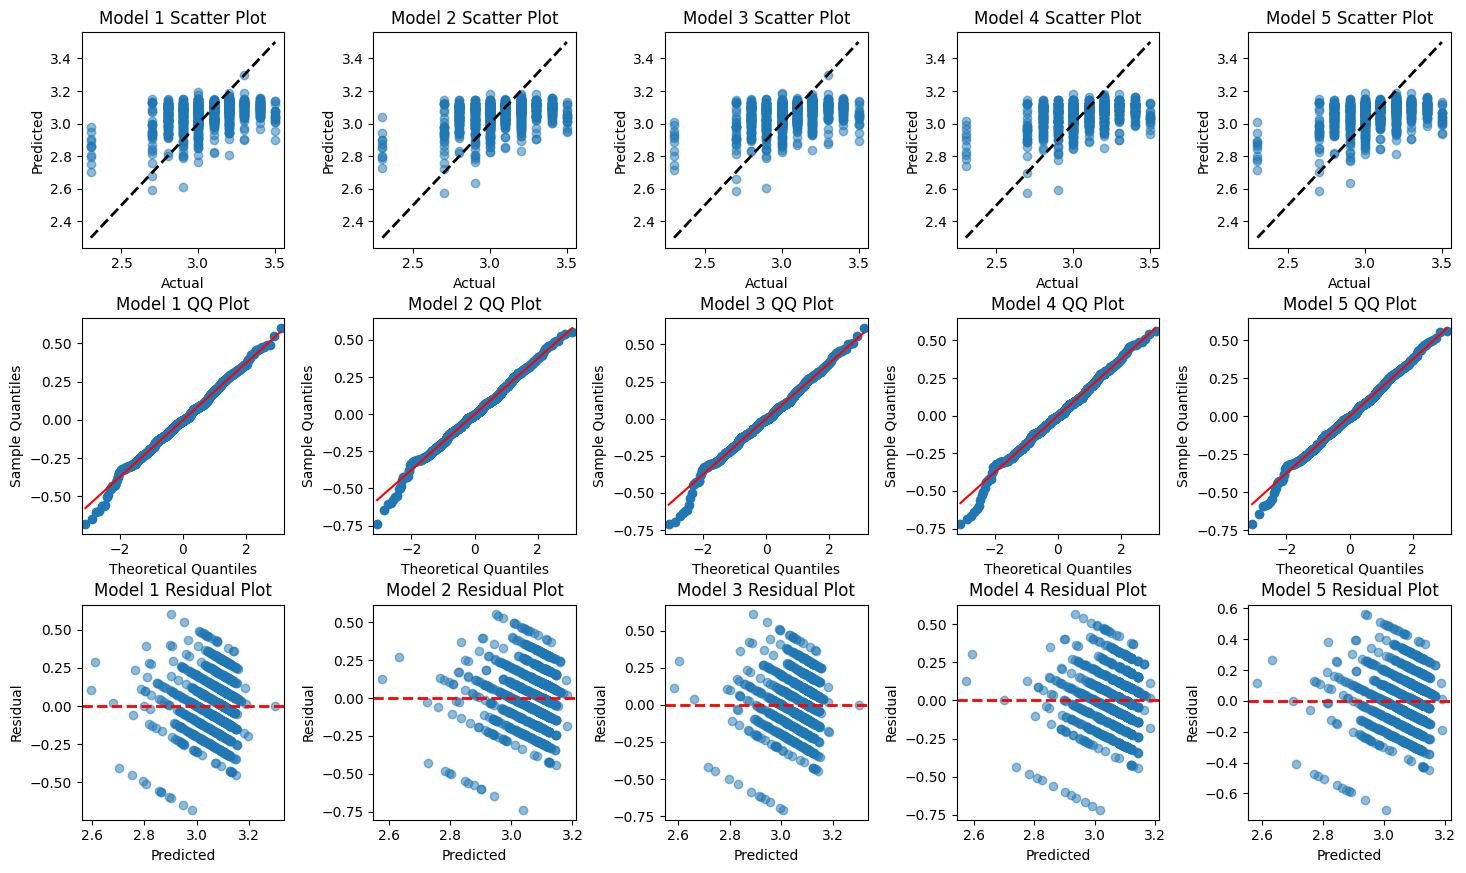

In [168]:
# Create a 3x5 subplot layout
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
fig.tight_layout(pad=3.0)

# Iterate through models
for i, model in enumerate([model1, model2, model3, model4, model5]):
    # Scatter plot with line of best fit
    ax = axes[0, i]
    y_pred = model.predict()
    ax.scatter(y, y_pred, alpha=0.5)
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    ax.set_title(f'Model {i+1} Scatter Plot')
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')

    # QQ Plot
    ax = axes[1, i]
    sm.qqplot(model.resid, line='s', ax=ax)
    ax.set_title(f'Model {i+1} QQ Plot')
    
    # Residual Plot
    ax = axes[2, i]
    ax.scatter(y_pred, model.resid, alpha=0.5)
    ax.axhline(y=0, color='r', linestyle='--', lw=2)
    ax.set_title(f'Model {i+1} Residual Plot')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Residual')

# Display the plots
plt.show()

# Model assessment
In terms of model performance, Model 5 technically had the highest Adjusted R-Squared. It had a score of 0.132, followed closely by Model 2 with a score of 0.131. Model 5 narrowed the dataset down to 10 variables while Model 2 narrowed it down to 7. Occam’s Razor guides us to select the simpler model with fewer variables. With an almost negligible difference, this makes Model 2 a better model. The 7 final variables of Model 2 are: street_litter_dstr, gov_property_graffiti_count, broken_glass_street_sidewalk_dstr, feces_count, syringes_count, pavement_defects, and key_comm_area.

In [223]:
# List of models
models = [model1, model2, model3, model4, model5]

# Calculate R-squared for each model and store in the DataFrame
rsquared_adj_values = []
for model in models:
    rsquared_adj = model.rsquared_adj
    rsquared_adj_values.append(rsquared_adj)

rsquared_adj_df = pd.DataFrame({'Adj. R-squared': rsquared_adj_values})

# Find the best model based on R-squared
best_model_value = sorted(rsquared_adj_df['Adj. R-squared'].copy())[-1]
best_model = rsquared_adj_df[rsquared_adj_df['Adj. R-squared'] == best_model_value].index[0]

# Find the second best model based on R-squared
second_best_model_value = sorted(rsquared_adj_df['Adj. R-squared'].copy())[-2]
second_best_model = rsquared_adj_df[rsquared_adj_df['Adj. R-squared'] == second_best_model_value].index[0]

# Display the Adj. R-squared values for all models
print("Adj. R-squared values for each model:")
rsquared_adj_df.index = [f"Model {i+1}" for i in range(len(models))]
print(rsquared_adj_df)

# Print the best model
print("Best model based on Adj. R-squared: Model", best_model + 1)
print("Second best model based on Adj. R-squared: Model", second_best_model + 1)

Adj. R-squared values for each model:
         Adj. R-squared
Model 1        0.122695
Model 2        0.130604
Model 3        0.117448
Model 4        0.125399
Model 5        0.131695
Best model based on Adj. R-squared: Model 5
Second best model based on Adj. R-squared: Model 2


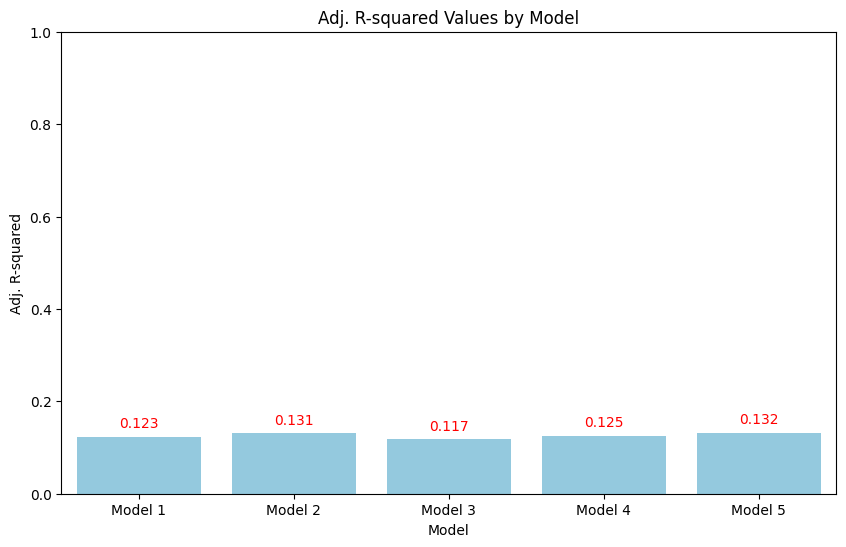

In [249]:
# Plot the Adj. R-squared values for visual comparison
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=rsquared_adj_df.index, y=rsquared_adj_df['Adj. R-squared'], color='skyblue')
plt.ylim(0, 1)  # Set y-axis limits to max 1
plt.xlabel('Model')
plt.ylabel('Adj. R-squared')
plt.title('Adj. R-squared Values by Model')

# Add labels to the bars
for i, v in enumerate(list(rsquared_adj_df['Adj. R-squared'])):
    ax.text(i, v + 0.02, f'{v:.3f}', ha='center', color='red')

plt.show()